<a href="https://colab.research.google.com/github/rosustefan/python-projects/blob/main/my_python_projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projects

## Menstrual Cycle and Ovulation Calculator Using `date`, `timedelta` and `calendar`

In [ ]:
from datetime import date
from datetime import datetime
from datetime import timedelta
import calendar
from IPython.display import clear_output

try:
    from colorama import Fore  # import colorama
except:
    print("Installing module 'colorama'")
    !pip3 install colorama --quiet  # install colorama package
    from colorama import Fore


print_format= "%a, %d-%b-%Y, Week %W"

# Get the current date
current_date = datetime.now()

def calculate_next_period():
    clear_output()
    try:
        my_year, my_month, my_day = map(int, input("Type the year, month and date separated by spaces(if empty/invalid will default to current date): ").split())
    except ValueError:
        # Extract the year, month, and day from the current date
        my_year = current_date.year
        my_month = current_date.month
        my_day = current_date.day
        print(f"[INFO] Invalid input provided, using the current date.")
    except Exception as e:
        print(f"Something went wrong when processing the date: {e}")
        exit(e)

    # Get the days to add to the current menstrual date
    try:
        days_to_add = input("Type the number of days to add (if empty/invalid will default to 28): ")
        days_to_add = int(days_to_add) -1
    except ValueError:
        print("[INFO] Invalid input provided, using the default value.")
        days_to_add = 28 - 1  # minus 1 to also count the first day of the period 'my_day'
    except Exception as e:
        print(f"Something went wrong when processing the days to add: {e}")
        exit(e)

    current_period = date(my_year, my_month, my_day)
    next_period = current_period + timedelta(days=days_to_add)

    print(f"\nInput date: {current_period.strftime(print_format)}")
    print(f"+{days_to_add+1} day(s): {next_period.strftime(print_format)}\n")

    # Create a calendar object
    current_month_calendar = calendar.monthcalendar(my_year, my_month)

    # Extract the day from the next_period
    next_period_day = next_period.day

    # Define the fertile period number of days
    fertile_days = 5

    # Get number of days in the current month
    _, num_days = calendar.monthrange(my_year, my_month)

    # Calculate the fertile_period
    fertile_period = [
        (next_period_day - 14 - i) % num_days + 1
        for i in range(fertile_days)
    ]

    # Define the days of the week
    days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

    # Print the current month's name and the days of the week in the header
    days = ' '.join(days)
    print(f"{calendar.month_name[my_month]} {my_year}".center(len(days)))
    print(days)

    # Print the calendar for the current month
    for week in current_month_calendar:
        for day in week:
            if day == 0:
                print("   ", end=" ")  # Print spaces for days outside the month
            else:
                if day == my_day:
                    print(f"{Fore.RED}{day:2}{Fore.RESET}  ", end="")
                elif day in fertile_period:
                    if day > my_day:
                        print(f"{Fore.GREEN}{day:2}{Fore.RESET}  ", end="")  # Emphasize the fertile days
                        fertile_period.remove(day)  # Remove the printed fertile days from the array
                    else:
                        print(f"{day:2}  ", end="")
                elif day == next_period_day and next_period.month == my_month:
                    print(f"{Fore.RED}{day:2}{Fore.RESET}  ", end="")  # Emphasize the specified day(s)
                else:
                    print(f"{day:2}  ", end="")
        print()  # Move to the next line for the next week

    # Check if the next_period day is in the next month
    if next_period.month != my_month:
        next_month = my_month % 12 + 1  # Increment the month and wrap to January if necessary
        next_year = my_year + 1 if next_month == 1 else my_year  # If next month is January, increment the year
        next_month_calendar = calendar.monthcalendar(next_year, next_month)  # Create the calendar for the next month

        # Print next month's name and the days of the week in the header
        print("\n" + f"{calendar.month_name[next_month]} {next_year}".center(len(days)))
        print(days)

        # Iterate through the rows (weeks) of the next month's calendar
        for week in next_month_calendar:
            for day in week:
                if day == 0:
                    print("   ", end=" ")  # Print spaces for days outside the month
                else:
                    if day in fertile_period:  # and day <= next_period_day:
                        print(f"{Fore.GREEN}{day:2}{Fore.RESET}  ", end="")  # Emphasize the fertile days
                    elif day == next_period_day:
                        print(f"{Fore.RED}{day:2}{Fore.RESET}  ", end="")  # Emphasize next period
                    else:
                        print(f"{day:2}  ", end="")
            print()  # Move to the next line for the next week


print(f"This program predicts the date of {Fore.RED}the next menstrual cycle\
{Fore.RESET} based on the input date.\nMoreover, it also highlights {Fore.GREEN}the ovulation days{Fore.RESET}.\n")
input("Press any key to continue.")

while True:
    calculate_next_period()
    show_me_more = input("\nPress any key to continue or 'no' to stop: ").lower().strip()
    if show_me_more == 'no':
        break


Type the year, month and date separated by spaces(if empty/invalid will default to current date): 2023 11 7
Type the number of days to add (if empty/invalid will default to 28): 30

Input date: Tue, 07-Nov-2023, Week 45
+30 day(s): Wed, 06-Dec-2023, Week 49

       November 2023       
Mon Tue Wed Thu Fri Sat Sun
         1   2   3   4   5  
 6   7   8   9  10  11  12  
13  14  15  16  17  18  19  
20  21  22  23  24  25  26  
27  28  29  30              

       December 2023       
Mon Tue Wed Thu Fri Sat Sun
                 1   2   3  
 4   5   6   7   8   9  10  
11  12  13  14  15  16  17  
18  19  20  21  22  23  24  
25  26  27  28  29  30  31  

Press any key to continue or 'no' to stop: no


# Sorting Algorithms

## Python Sort Using `.sort()`

The Python `.sort()` and `sorted()` use the **Timsort** algorithm which is a hybrid sorting algorithm, derived from merge sort and insertion sort. It was invented by Tim Peters in 2002 for use in the Python programming language. The algorithm finds subsets of the data that are already ordered, and uses the subsets to sort the data more efficiently. This is done by merging an identified subset, called a run, with existing runs until certain criteria are fulfilled. Timsort has been Python’s standard sorting algorithm since version 2.3

In [ ]:
my_array = [5, 2, 7, 1, 13, 21, 15]
sorted_array = [1, 2, 5, 7, 13, 15, 21]

In [ ]:
%%timeit -n 10000

my_array.sort()

264 ns ± 107 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
assert my_array == sorted_array, "The array was not properly sorted."

## Selection Sort @ Brilliant


### Pseudocode

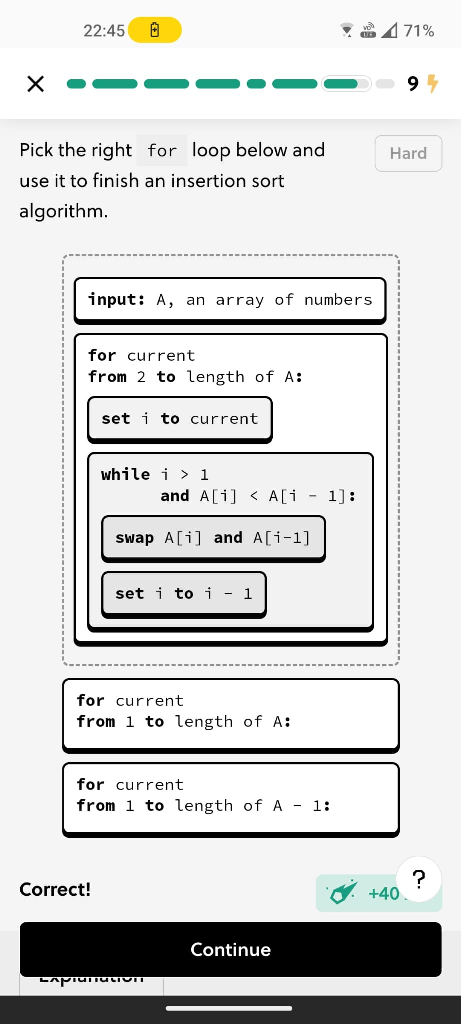

### Python Code

In [ ]:
my_array = [5, 2, 7, 1, 13, 21, 15]
sorted_array = [1, 2, 5, 7, 13, 15, 21]

In [ ]:
%%timeit -n 10000

for current in range(0, (len(my_array) - 1)):
    min_index = current

    for i in range((current + 1), len(my_array)):
        if my_array[i] < my_array[min_index]:
            min_index = i

    my_array[current], my_array[min_index] =\
     my_array[min_index], my_array[current]

7.34 µs ± 1.64 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
assert my_array == sorted_array, "The array was not properly sorted."

## Insertion Sort @ Brilliant

### Pseudocode

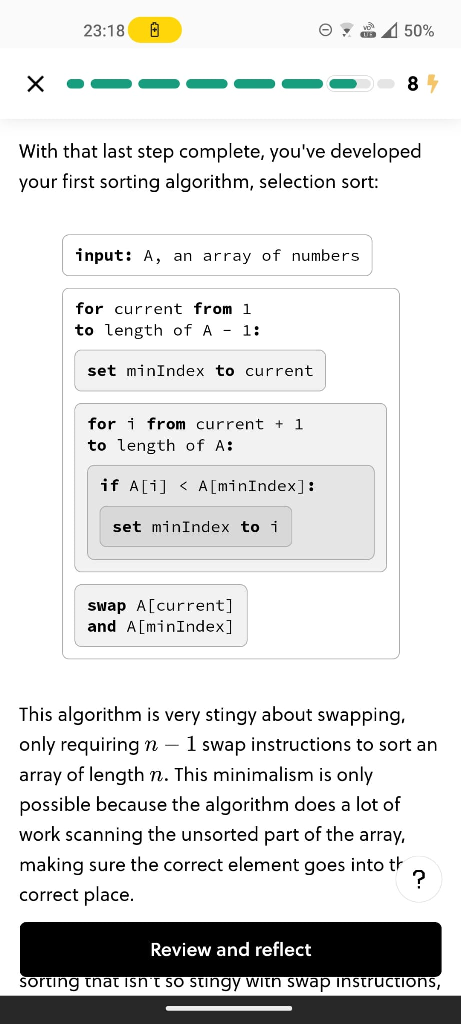

### Python Code

In [ ]:
my_array = [5, 2, 7, 1, 13, 21, 15]
sorted_array = [1, 2, 5, 7, 13, 15, 21]

In [ ]:
%%timeit -n 10000

for current in range(len(my_array)-1, 1, -1):
    i = current

    while (i > 0) and (my_array[i] < my_array[i-1]):
        my_array[i-1], my_array[i] = my_array[i], my_array[i-1]

        i = i - 1

2.09 µs ± 105 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
assert my_array == sorted_array, "The array was not properly sorted."

## Bubble Sort @ Python Institute

In [ ]:
my_array = [5, 2, 7, 1, 13, 21, 15]
my_array_copy = my_array.copy()
sorted_array = [1, 2, 5, 7, 13, 15, 21]

In [ ]:
%%timeit -n 10000

swapped = True
while swapped:
    # if no elements have been swapped then the list is sorted
    swapped = False
    for i in range(len(my_array) -1):
        if my_array[i] > my_array[i+1]:
            # an element was swapped == it "bubbled to the top"
            swapped = True
            my_array[i], my_array[i+1] = my_array[i+1], my_array[i]

1.14 µs ± 347 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [ ]:
assert my_array == sorted_array, "The array was not properly sorted."

In [ ]:
print("The original unsorted list is:", my_array_copy, "\n...and the sorted list is:", my_array)

The original unsorted list is: [5, 2, 7, 1, 13, 21, 15] 
...and the sorted list is: [1, 2, 5, 7, 13, 15, 21]


# Various Algorithms & Pieces of Code

## [PCPP 4 of 5] 2.1.1.2 LAB: Vehicle data decoder/encoder

## [PCPP 4 of 5] 2.1.1.1 LAB: HTTP server availability checker

In [ ]:
'''
Learn how to:
- use the json module and its basic facilities;
- encode and decode JSON strings from/to Python objects.

https://edube.org/learn/pcpp1-working-with-restful-apis/vehicle-data-decoder-encoder
'''

DEBUG = True

import json


def create_vehicle(your_choice: int):
    vehicle_labels = {
        "Registration number": "registration_number",
        "Year of production": "year_of_production",
        "Passenger [y/n]": "passenger",
        "Vehicle mass": "mass",
    }

    #TODO: Exception management for user input.
    match your_choice:
        case 1:
            vehicle = {}
            for k, v in vehicle_labels.items():
                vehicle[v] = input(f"{k}: ")
            if DEBUG:
                print(f"[DEBUG] The input data for my vehicle is: {vehicle}")
            my_vehicle = Vehicle(vehicle)
            if DEBUG:
                print(
                    f"[DEBUG] The Vehicle class instance for my vehicle is: {my_vehicle}"
                )
            json_str = json.dumps(my_vehicle, cls=JsonEncode)
            if DEBUG:
                print(f"[DEBUG] The type of the resulting object is: {type(json_str)}")
            print("Result: ", json_str)
        case 2:
            json_str = input("Enter vehicle JSON string: ")
            python_str = json.loads(json_str, cls=JsonDecode)
            if DEBUG:
                print(
                    f"[DEBUG] The type of the resulting object is: {type(python_str)}"
                )
            print("Result: ", python_str.__dict__)
        case _:
            print("Something went wrong")


class Vehicle:
    def __init__(self, vehicle: dict):
        self.registration_number = str(vehicle["registration_number"])
        self.year_of_production = int(vehicle["year_of_production"])
        if vehicle["passenger"] in ["y", True]:
            self.passenger = True
        elif vehicle["passenger"] in ["n", False]:
            self.passenger = False
        self.mass = float(vehicle["mass"])

    def __str__(self):
        return f"{self.registration_number};{self.year_of_production};{self.passenger};{self.mass}"


class JsonEncode(json.JSONEncoder):
    def default(self, w):
        if isinstance(w, Vehicle):
            return w.__dict__
        else:
            return super().default(self, z)


class JsonDecode(json.JSONDecoder):
    def __init__(self):
        json.JSONDecoder.__init__(self, object_hook=self.decode_vehicle)

    def decode_vehicle(self, d):
        return Vehicle(d)


if __name__ == "__main__":
    print("What can I do for you?")
    print("1 - produce a JSON string describing a vehicle")
    print("2 - decode a JSON string into vehicle data")
    your_choice = int(input("Your choice: "))

    create_vehicle(your_choice)


### My solution

In [ ]:
'''
2.1.1.1 HTTP server availability checker

See the Python Institute page for the objectives and requirements:
https://edube.org/learn/pcpp1-working-with-restful-apis/http-server-availability-checker
'''

import sys
import requests


def check_port_number():
    try:
        website_address = str(sys.argv[1])
        port_number = int(sys.argv[2])
        if not (1 <= port_number <= 65535):
            raise ValueError("The port number must be between 1 and 65535.")
    except ValueError:
        print("Invalid port number. Please provide a valid integer.")
        # Use this line in Google Colab, Jupyter NB, but not on local machines
        website_and_port = "https://www.google.ro:443"
        exit(2)
    else:
        website_and_port = website_address + ":" + str(port_number)
        print(f"Website to check: {website_and_port}")

    # Check the server's availability
    check_server_availability(website_and_port)


def check_server_availability(website_and_port):
    try:
        # HEAD method instead of GET — it forces the server to send the full
        # response header but without any content
        reply = requests.head(website_and_port)
    except requests.RequestException:
        print("Communication error")
        exit(3)
    except:
        print("Connection failed due to an unknown reason.")
        exit(4)
    else:
        if reply.status_code == requests.codes.ok:
            print(f"Success! The server {website_and_port} works properly.")
            print("Server's response is: ", reply.text)
        else:
            print("Server error")


if __name__ == "__main__":
    # Check that the positional arguments are provided
    if len(sys.argv) != 3:
        print("Usage: python3 <script_name.py> <website> <port>")
        exit(1)

    # Check the port argument is an int between 1..65535
    check_port_number()


Invalid port number. Please provide a valid integer.
Success! The server https://www.google.ro:443 works properly.
Server's response is:  


### ChatGPT 3.5's solution

In [ ]:
import sys
import socket


def send_http_request(host, port):
    try:
        # Create a socket object
        client_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)

        # Connect to the server
        client_socket.connect((host, port))

        # Send an HTTP HEAD request
        request = f"HEAD / HTTP/1.1\r\nHost: {host}\r\n\r\n"
        client_socket.send(request.encode())

        # Receive the response
        response = client_socket.recv(4096).decode()

        # Close the socket
        client_socket.close()

        return response
    except (socket.error, ConnectionRefusedError):
        return "Communication error"
    except Exception as e:
        return f"Connection failed due to an unknown reason: {e}"


if len(sys.argv) != 3:
    print("Usage: python3 <script_name.py> <website> <port>")
    exit(1)

try:
    website_address = str(sys.argv[1])
    port_number = int(sys.argv[2])
    if not (1 <= port_number <= 65535):
        raise ValueError("The port number must be between 1 and 65535.")
except ValueError:
    print("Invalid port number. Please provide a valid integer.")
    exit(2)
else:
    website_and_port = f"{website_address}:{port_number}"
    print(f"Website to check: {website_and_port}")

    # Send the HTTP request using the socket module
    http_response = send_http_request(website_address, port_number)

    if "Communication error" in http_response:
        print(http_response)
        exit(3)
    elif "Connection failed" in http_response:
        print(http_response)
        exit(4)
    else:
        print(f"Success! The server {website_and_port} works properly.")
        print("Server's response is:\n", http_response)


## [PCPP 3 of 5] 3.2.1.1 PROJECT: Pocket calculator

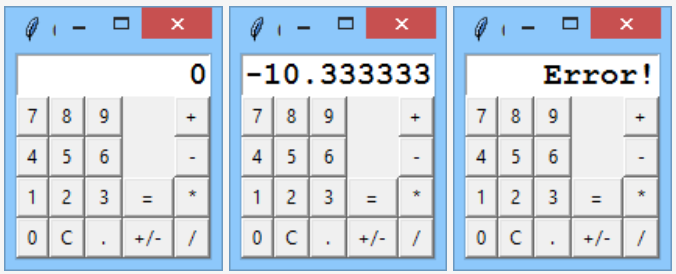

In [ ]:
# Relied heavily on ChatGPT3.5 Turbo for this assignment
# Error not yet implemented

import tkinter as tk


def button_click(number):
    current = display.get()
    display.delete(0, tk.END)
    display.insert(tk.END, current + str(number))


def button_clear():
    display.delete(0, tk.END)


def button_equal():
    expression = display.get()
    # Custom expression evaluation or library can be used here
    result = eval(expression)
    display.delete(0, tk.END)
    display.insert(tk.END, result)


def button_negative():
    current = display.get()
    display.delete(0, tk.END)
    if current.startswith("-"):
        display.insert(tk.END, current[1:])
    else:
        display.insert(0, "-" + current)


def button_decimal():
    current = display.get()
    if "." not in current:
        display.insert(tk.END, ".")


def create_button(root, text, row, column, command):
    button = tk.Button(root, text=text, padx=20, pady=10, command=command)
    button.grid(row=row, column=column, padx=1, pady=1, sticky="nsew")

    return button


root = tk.Tk()
root.title("Calculator")

display = tk.Entry(root, width=20, justify="right", font=("Arial", 18))
display.grid(row=0, column=0, columnspan=4, padx=1, pady=1)

buttons = {}
number_buttons = ["7", "8", "9", "4", "5", "6", "1", "2", "3", "0"]
for i, button_text in enumerate(number_buttons):
    if button_text == "0":
        buttons[button_text] = create_button(
            root,
            button_text,
            5,
            0,
            lambda num=button_text: button_click(num),
        )
    else:
        buttons[button_text] = create_button(
            root,
            button_text,
            4 - (i // 3),
            i % 3,
            lambda num=button_text: button_click(num),
        )

operators = {
    "+": lambda: button_click("+"),
    "-": lambda: button_click("-"),
    "*": lambda: button_click("*"),
    "/": lambda: button_click("/"),
}

create_button(root, "+", 2, 4, operators["+"])
create_button(root, "-", 3, 4, operators["-"])
create_button(root, "*", 4, 4, operators["*"])
create_button(root, "/", 5, 4, operators["/"])
create_button(root, "=", 4, 3, button_equal)
create_button(root, "C", 5, 1, button_clear)
create_button(root, "+/-", 5, 3, button_negative)
create_button(root, ".", 5, 2, button_decimal)

root.columnconfigure(0, weight=1)
root.columnconfigure(1, weight=1)
root.columnconfigure(2, weight=1)
root.columnconfigure(3, weight=1)
root.rowconfigure(0, weight=1)
root.rowconfigure(1, weight=1)
root.rowconfigure(2, weight=1)
root.rowconfigure(3, weight=1)
root.rowconfigure(4, weight=1)
root.rowconfigure(5, weight=1)

root.mainloop()


## [PCPP 3 of 5] 3.1.1.5 LAB: Traffic lights

In [ ]:
# https://edube.org/learn/pcpp1-4-gui-programming/lab-traffic-lights
#
# the red light is lit,
# the red and yellow lights are lit together,
# the green light is lit,
# the yellow light is lit.

import tkinter as tk
from tkinter import messagebox


PHASES = (
    (True, False, False),
    (True, True, False),
    (False, False, True),
    (False, True, False),
)

# Write your code here.
current_phase_index = 1
LIGHT_GREY = "#CCCCCC"


def change_color():
    global current_phase_index
    red, yellow, green = PHASES[current_phase_index]

    canvas.itemconfig(red_color, fill="red" if red else LIGHT_GREY)
    canvas.itemconfig(yellow_color, fill="yellow" if yellow else LIGHT_GREY)
    canvas.itemconfig(green_color, fill="green" if green else LIGHT_GREY)

    # Move to the next color phase
    current_phase_index = (current_phase_index + 1) % len(PHASES)


def quit_app():
    replay = messagebox.askquestion("Quit?", "Are you sure?")
    if replay == "yes":
        window.destroy()


window = tk.Tk()

canvas = tk.Canvas(window, width=150, height=430, bg="grey")
red_color = canvas.create_oval(15, 15, 140, 140, outline="black", width=4, fill="red")
yellow_color = canvas.create_oval(
    15, 155, 140, 280, outline="black", width=4, fill=LIGHT_GREY
)
green_color = canvas.create_oval(
    15, 295, 140, 420, outline="black", width=4, fill=LIGHT_GREY
)
canvas.grid(row=0)


button = tk.Button(window, text="Next", command=change_color)
button.grid(row=1)
button = tk.Button(window, text="Quit", command=quit_app)
button.grid(row=2)

window.mainloop()


## [PCPP 3 of 5] 3.1.1.4 LAB: The Clicker

In [ ]:
# The Clicker's board consists of 25 buttons and each of the buttons
# contains a random number from range 1..999. Note: each number is different!
#
# Below the board there is a timer which initially shows 0. The timer starts
# when the user clicks the board for the first time.
#
# We expect the player to click all the buttons in the order imposed by
# the numbers - from the lowest to the highest one. Additional rules say
# that:
# - the properly clicked button changes the button's state to DISABLED
# (it greys the button out)
# - the improperly clicked button shows no activity,
# - the timer increases its value every second,
# - when all the buttons are greyed out (i.e., the player has completed
# his/her task) the timer stops immediately.

import tkinter as tk
from tkinter import messagebox
import random
import time


def popup_notification():
    messagebox.showinfo(
        "Game Instructions", message="Click all the numbers in ascending order!"
    )


def button_click(button_text):
    numbers_left = len(sorted_button_values)
    if numbers_left > 1:
        timer.start_stopwatch()
        print(numbers_left)
    else:
        timer.stop_stopwatch()
        exit

    print("Button clicked:", button_text)
    for button in buttons:
        if button.cget("text") == button_text:
            if int(button_text) == sorted_button_values[0]:
                sorted_button_values.pop(0)  # Remove the first element
                button.configure(state="disabled")
                break


class StopwatchApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Stopwatch")

        self.running = False
        self.start_time = None

        self.label = tk.Label(root, text="00:00:00", font=("Helvetica", 12))
        self.label.grid(row=6, column=2)

    def start_stopwatch(self):
        if not self.running:
            self.running = True
            self.start_time = time.time()
            self.update_time()

    def stop_stopwatch(self):
        self.running = False

    def update_time(self):
        if self.running:
            elapsed_time = time.time() - self.start_time
            hours = int(elapsed_time / 3600)
            minutes = int((elapsed_time % 3600) / 60)
            seconds = int(elapsed_time % 60)
            time_str = "{:02d}:{:02d}:{:02d}".format(hours, minutes, seconds)
            self.label.config(text=time_str)
            self.root.after(1000, self.update_time)


root = tk.Tk()
root.geometry("420x270")
root.resizable(False, False)

# Game description
popup_notification()

# Define the width and height for each button
button_width = 10
button_height = 2

# Create the 25 random values for the buttons
random_button_values = [random.randint(1, 999) for _ in range(25)]
sorted_button_values = sorted(random_button_values)

# Create the 25 buttons using a `for` loop
buttons = []
for i in range(5):
    for j in range(5):
        button_text = random_button_values[i * 5 + j]
        button = tk.Button(
            root,
            text=button_text,
            width=button_width,
            height=button_height,
            command=lambda text=button_text: button_click(text),
        )
        button.grid(row=i, column=j, padx=2, pady=2)
        buttons.append(button)

# Create an instance of the stopwatch
timer = StopwatchApp(root)


# Start the stopwatch when any button is pushed
def start_stopwatch():
    timer.start_stopwatch()


# Stop the stopwatch when all buttons were pressed in ascending order
def stop_stopwatch():
    timer.stop_stopwatch()


root.mainloop()


## [PCPP 3 of 5] 3.1.1.3 LAB: Catch Me If You Can

In [ ]:
# Write a simple game - an infinite game which humans cannot win.
# Here are the rules:

# - the game goes on between TkInter and the user (probably you)
# - TkInter opens a 500x500 pixel window and places a button saying
# "Catch me!" in the top-left corner of the window;
# - if the user moves the mouse cursor over the button, the button
# immediately jumps to another location inside the window; you have
# to assure that the new location is distant enough to prevent the
# user from making an instant click,
# - the button must not cross the window's boundaries during the jump!

import tkinter as tk
import random


SIZE = 500


def move_on_hover(event=None):
    new_x = random.randint(10, 440)
    new_y = random.randint(10, 440)
    button.place(x=new_x, y=new_y)


window = tk.Tk()
window.title = "Catch Me If You Can!"
window.geometry(f"{SIZE}x{SIZE}")
# window.minsize(width=SIZE, height=SIZE)
# window.maxsize(width=SIZE, height=SIZE)
window.resizable(False, False)


button = tk.Button(window, text="Catch me!")
button.place(x=10, y=10)
button.bind("<Enter>", move_on_hover)
# button.bind("<Leave>", move_on_hover)

window.mainloop()


TclError: no display name and no $DISPLAY environment variable

## [PCPP 3 of 5] 3.1.1.2 LAB: A Very Simple Calculator

In [ ]:
# Scenario:
#
# You need a calculator. A very simple and very specific calculator.
# Look at the picture - it contains two fields that the user can use
# to enter arguments, a radio button to select the operation to perform,
# and a button initiating the evaluation:

import tkinter as tk
from tkinter import messagebox


def evaluate_expression():
    try:
        # Get the selected operation
        selected_operation = operations[switch_radio.get()]

        # Get the input values
        value1 = float(input_1.get())
        value2 = float(input_2.get())

        match selected_operation:
            case "+":
                result = value1 + value2
            case "-":
                result = value1 - value2
            case "*":
                result = value1 * value2
            case "/":
                if value2 != 0:
                    result = value1 / value2
                else:
                    # Handle division by zero
                    messagebox.showerror("Error", "Cannot divide by zero")
                    return
            # Invalid operation
            case _:
                messagebox.showerror("Error", "Invalid operation")
                return

        # Show the result in an info message
        messagebox.showinfo("Result", f"Result: {result:.2f}")

    except ValueError:
        # Handle invalid input (non-numeric values)
        messagebox.showerror("Error", "Invalid input. Please enter numeric values.")


calculator = tk.Tk()
calculator.title("A Very Simple Calculator")
calculator.tk.call(
    "wm", "iconphoto", calculator._w, tk.PhotoImage(file="labs/calculator.png")
)

# Display the user text entries
input_1 = tk.IntVar()
argument_1 = tk.Entry(calculator, textvariable=input_1)
argument_1.pack(side="left")
input_2 = tk.IntVar()
argument_2 = tk.Entry(calculator, textvariable=input_2)
argument_2.pack(side="right")

# Display the available operations
switch_radio = tk.IntVar()
switch_radio.set(0)
operations = ["+", "-", "*", "/"]
for idx, operation in enumerate(operations):
    button = "radiobutton_" + str(idx)
    button = tk.Radiobutton(
        calculator, text=operation, variable=switch_radio, value=idx
    )
    button.pack()

# Evaluate the entries based on the selected operation
evaluate_button = tk.Button(calculator, text="Evaluate", command=evaluate_expression)
evaluate_button.pack(side="bottom")

calculator.mainloop()


TclError: no display name and no $DISPLAY environment variable

## [PCPP 3 of 5] 3.1.1.2 LAB: A very simple calculator

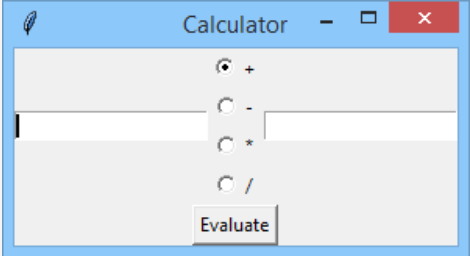

In [ ]:
# Scenario:
#
# You need a calculator. A very simple and very specific calculator.
# Look at the picture - it contains two fields that the user can use
# to enter arguments, a radio button to select the operation to perform,
# and a button initiating the evaluation:

import tkinter as tk
from tkinter import messagebox


def evaluate_expression():
    try:
        # Get the selected operation
        selected_operation = operations[switch_radio.get()]

        # Get the input values
        value1 = float(input_1.get())
        value2 = float(input_2.get())

        match selected_operation:
            case "+":
                result = value1 + value2
            case "-":
                result = value1 - value2
            case "*":
                result = value1 * value2
            case "/":
                if value2 != 0:
                    result = value1 / value2
                else:
                    # Handle division by zero
                    messagebox.showerror("Error", "Cannot divide by zero")
                    return
            # Invalid operation
            case _:
                messagebox.showerror("Error", "Invalid operation")
                return

        # Show the result in an info message
        messagebox.showinfo("Result", f"Result: {result:.2f}")

    except ValueError:
        # Handle invalid input (non-numeric values)
        messagebox.showerror("Error", "Invalid input. Please enter numeric values.")


calculator = tk.Tk()
calculator.title("A Very Simple Calculator")
calculator.tk.call(
    "wm", "iconphoto", calculator._w, tk.PhotoImage(file="labs/calculator.png")
)

# Display the user text entries
input_1 = tk.IntVar()
argument_1 = tk.Entry(calculator, textvariable=input_1)
argument_1.pack(side="left")
input_2 = tk.IntVar()
argument_2 = tk.Entry(calculator, textvariable=input_2)
argument_2.pack(side="right")

# Display the available operations
switch_radio = tk.IntVar()
switch_radio.set(0)
operations = ["+", "-", "*", "/"]
for idx, operation in enumerate(operations):
    button = "radiobutton_" + str(idx)
    button = tk.Radiobutton(
        calculator, text=operation, variable=switch_radio, value=idx
    )
    button.pack()

# Evaluate the entries based on the selected operation
evaluate_button = tk.Button(calculator, text="Evaluate", command=evaluate_expression)
evaluate_button.pack(side="bottom")

calculator.mainloop()


## [PCPP] 5.1.1.10 Metaprogramming – LAB: metaclasses

In [ ]:
import time
import datetime


def get_instantiation_time(self):
    print("Class instantiated at:", datetime.datetime.fromtimestamp(self.instantiation_time))


class My_Meta(type):
    def __new__(mcs, name, bases, dictionary):
        if 'get_instantiation_time' not in dictionary:
            dictionary['get_instantiation_time'] = get_instantiation_time
        obj = super().__new__(mcs, name, bases, dictionary)
        obj.instantiation_time = time.time()
        return obj


class My_Class1(metaclass=My_Meta):
    pass


for k, v in My_Class1.__dict__.items():
    print(k, ":", v)
print()

first_object = My_Class1()
first_object.get_instantiation_time()


__module__ : __main__
get_instantiation_time : <function get_instantiation_time at 0x78eba4c01900>
__dict__ : <attribute '__dict__' of 'My_Class1' objects>
__weakref__ : <attribute '__weakref__' of 'My_Class1' objects>
__doc__ : None
instantiation_time : 1706532470.269191

Class instantiated at: 2024-01-29 12:47:50.269191


## [PCPP] 4.3.1.2 Serialization of Python objects using the shelve module

The meaning of the optional flag parameter:
- 'r'	Open existing database for reading only
- 'w'	Open existing database for reading and writing
- 'c'	Open database for reading and writing, creating it if it doesn’t exist (this is a default value)
- 'n'	Always create a new, empty database, open for reading and writing

You should treat a shelve object as a Python dictionary, with a few additional notes:
- the keys must be strings;
- Python puts the changes in a buffer which is periodically flushed to the disk. To enforce an immediate flush, call the sync() method on your shelve object;
- when you call the close() method on an shelve object, it also flushes the buffers.

When you treat a shelve object like a Python dictionary, you can make use of the dictionary utilities:
- the len() function;
- the in operator;
- the keys() anditems() methods;
- the update operation, which works the same as when applied to a Python dictionary;
- the del instruction, used to delete a key-value pair.

After running the code, you'll notice additionally that some files are created to support the database. Don’t try to alter those files with external utilities, because your shelve may become inconsistent, resulting in read/write errors.

The use of shelve is really easy and effective. Moreover, you should know that you could simulate the shelve by pickling the whole dictionary, but the shelve module uses the memory more efficiently, so whenever you need access to pickled objects, employ a shelve.

And the final remark is:
- because the shelve module is backed by pickle, it isn’t safe to load a shelve from an untrusted source. As with pickle, loading a shelve can execute arbitrary code.


In [ ]:
import shelve


shelve_name = 'first_shelve.shlv'
my_shelve = shelve.open(shelve_name, flag='c')

my_shelve['EUR'] = {'code':'Euro', 'symbol': '€'}
my_shelve['GBP'] = {'code':'Pounds sterling', 'symbol': '£'}
my_shelve['USD'] = {'code':'US dollar', 'symbol': '$'}
my_shelve['JPY'] = {'code':'Japanese yen', 'symbol': '¥'}
my_shelve.close()

new_shelve = shelve.open(shelve_name)
print(new_shelve['USD'])
new_shelve['RON'] = {'code':'Romanian New Leu', 'symbol':'RON'}
new_shelve.close()

new_shelve = shelve.open(shelve_name)
print(new_shelve['RON'])
new_shelve.close()


{'code': 'US dollar', 'symbol': '$'}
{'code': 'Romanian New Leu', 'symbol': 'RON'}


## [PCPP] 4.1.1.13 LAB #2 - Deep Copy and Shallow Copy of Objects Using Classes


In [ ]:
import copy
import time


class Delicacy:
    def __init__(self, name, price, weight):
        self.name = name
        self.price = price
        self.weight = weight

    def __str__(self):
        return f'Delicacy: {self.name} | Price: {self.price} | Weight: {self.weight}'


# instantiate the previous dictionary objects as Delicacy instances
lolly_pop = Delicacy('Lolly Pop', 0.4, 133)
licorice = ('Licorice', 0.1, 251)
chocolate = ('Chocolate', 1, 601)
sours = ('Sours', 0.01, 513)
hard_candies = ('Hard candies', 0.3, 433)

print(f"lolly_pop has id {id(lolly_pop)}")

print()

start_time = time.time()
lolly_pop_shallow_cp = copy.copy(lolly_pop)
print(f"Time to perform a shallow copy is {round((time.time() - start_time), 3)}")
print(f"lolly_pop_shallow_cp has id {id(lolly_pop_shallow_cp)}")

print()

start_time = time.time()
lolly_pop_deep_cp = copy.copy(lolly_pop)
print(f"Time to perform a deep copy is {round((time.time() - start_time), 3)}")
print(f"lolly_pop_deep_cp has id {id(lolly_pop_deep_cp)}")


lolly_pop has id 135031451752992

Time to perform a shallow copy is 0.0
lolly_pop_shallow_cp has id 135031451751360

Time to perform a deep copy is 0.0
lolly_pop_deep_cp has id 135031451757888


## [PCPP] 4.1.1.12 LAB #1 Deep Copy of Objects and Price Discounts based on Weight Value

In [ ]:
import copy


warehouse = list()
warehouse.append({'name': 'Lolly Pop', 'price': 0.4, 'weight': 133})
warehouse.append({'name': 'Licorice', 'price': 0.1, 'weight': 251})
warehouse.append({'name': 'Chocolate', 'price': 1, 'weight': 601})
warehouse.append({'name': 'Sours', 'price': 0.01, 'weight': 513})
warehouse.append({'name': 'Hard candies', 'price': 0.3, 'weight': 433})

print('Source list of candies')
for item in warehouse:
    print(item)

print()

warehouse_sale = copy.deepcopy(warehouse)

print('Candies on sale')
for item in warehouse_sale:
    if item['weight'] > 300:
        item['price'] *= 0.8
    print(item)


Source list of candies
{'name': 'Lolly Pop', 'price': 0.4, 'weight': 133}
{'name': 'Licorice', 'price': 0.1, 'weight': 251}
{'name': 'Chocolate', 'price': 1, 'weight': 601}
{'name': 'Sours', 'price': 0.01, 'weight': 513}
{'name': 'Hard candies', 'price': 0.3, 'weight': 433}

Candies on sale
{'name': 'Lolly Pop', 'price': 0.4, 'weight': 133}
{'name': 'Licorice', 'price': 0.1, 'weight': 251}
{'name': 'Chocolate', 'price': 0.8, 'weight': 601}
{'name': 'Sours', 'price': 0.008, 'weight': 513}
{'name': 'Hard candies', 'price': 0.24, 'weight': 433}


## [PCPP] 2.7.1.5 LAB: Encapsulation using the `property` (getter), `setter` and `deleter` decorators

In [ ]:
# Implement a class representing an account exception
class NegativeBalance(Exception):
    pass


class AccountName(Exception):
    pass


# Implement a class representing a single bank account
class Account:
    def __init__(self, account):
        self.__account = account
        self.__balance = 0

    @property
    def account(self):
        return self.__account

    @account.setter
    def account(self, new_account):
        raise AccountName(f"Cannot change an existing account's name: {self.__account} -> {new_account}")

    @property
    def balance(self):
        return self.__balance

    @balance.setter
    def balance(self, amount):
        # when the bank operation (deposit or withdrawal) is above 100.000
        if amount > 100_000:
            print("Operation is above 100.000")

        if (self.__balance + amount) > 0:
            self.__balance += amount
        else:
            raise NegativeBalance("Cannot have a negative balance!")

    def delete_account(self):
        if self.__balance != 0:
            raise ValueError("Cannot delete an account with a non-zero balance")
        else:
            print(f"The account {self.__account} was deleted.")
            del self

    def __str__(self):
        return f"{self.__account}"


my_account = Account("IBAN238298")

# setting the balance to 1000
my_account.balance = 1000
print(f"The balance of the account {my_account} is {my_account.balance}")
print()

# trying to set the balance to -200
try:
    my_account.balance = -1200
except NegativeBalance as e:
    print(f"Error! Cannot withdraw -1200 from a balance of {my_account.balance}: {e}")
print()

# trying to set a new value for the account number should raise an error
try:
    my_account.account = "TEST123"
except AccountName as e:
    print(e)

my_test_account = Account("TEST123")
print(f"The balance of my test account {my_test_account} is {my_test_account.balance}")
print()

# deposit 1_000_000
my_account.balance = 1_000_000
print(f"The balance of the account {my_account} is {my_account.balance}")
print()

# trying to delete the account attribute containing a non-zero balance
try:
    my_account.delete_account()
except ValueError as e:
    print(f"Error! {e}")

# trying to delete the account attribute containing a zero balance
try:
    my_test_account.delete_account()
except ValueError as e:
    print(f"Error! {e}")


The balance of the account IBAN238298 is 1000

Error! Cannot withdraw -1200 from a balance of 1000: Cannot have a negative balance!

Cannot change an existing account's name: IBAN238298 -> TEST123
The balance of my test account TEST123 is 0

Operation is above 100.000
The balance of the account IBAN238298 is 1001000

Error! Cannot delete an account with a non-zero balance
The account TEST123 was deleted.


## [PCPP] 2.6.1.8 Abstract Base Classes (ABC)

In [ ]:
import abc  # abstract base class


class Scanner(abc.ABC):
    @abc.abstractmethod
    def scan_document(self):
        pass

    @abc.abstractmethod
    def get_scanner_status(self):
        pass


class Printer(abc.ABC):
    @abc.abstractmethod
    def print_document(self):
        pass

    @abc.abstractmethod
    def get_printer_status(self):
        pass


class MFD1(Scanner, Printer):
    resolution = "200dpi"

    def __init__(self, name, serial_number=None):
        self.name = name
        self.serial_number = serial_number

    def scan_document(self, document):
        operation = f"Scanned document: '{document}'"
        self.add_to_history(operation)
        return operation

    def get_scanner_status(self):
        operation = "Get scanner status"
        return f"Scanner information for MFD '{self.name}':\n\tresolution: {self.resolution}\n\tserial number: {self.serial_number}"

    def print_document(self, document):
        operation = f"Printed document: '{document}'"
        self.add_to_history(operation)
        return operation

    def get_printer_status(self):
        operation = "Get printer status"
        self.add_to_history(operation)
        return f"Printer information for MFD '{self.name}':\
        \n\tresolution: {self.resolution}\
        \n\tserial_number: {self.serial_number}"

    def add_to_history(self, operation):
        pass


class MFD2(MFD1):
    resolution = "400dpi"

    def __init__(self, name, serial_number=None):
        super().__init__(name, serial_number)
        self.history = []

    def add_to_history(self, operation):
        self.history.append(operation)

    def operation_history(self):
        return f"Operation(s) history: {self.history}"


class MFD3(MFD2):
    def get_fax(self, number):
        operation = f"Got fax from number '{number}'"
        self.add_to_history(operation)
        return operation


low_q_mfd = MFD1("LowQ", serial_number="ASDK982387")
print(low_q_mfd.scan_document("contract_original.pdf"))
print(low_q_mfd.get_scanner_status())
print(low_q_mfd.print_document("copie_contract_original.pdf"))
print(low_q_mfd.get_printer_status())

print()

medium_q_mfd = MFD2("MediumQ", serial_number="KFDUF98827386")
print(medium_q_mfd.scan_document("contract_original.pdf"))
print(medium_q_mfd.get_scanner_status())
print(medium_q_mfd.print_document("copie_contract_original.pdf"))
print(medium_q_mfd.get_printer_status())
print(medium_q_mfd.operation_history())

print()

premium_q_mfd = MFD3("PremiumQ", serial_number="PREM-235982")
print(premium_q_mfd.scan_document("contract_original.pdf"))
print(premium_q_mfd.get_scanner_status())
print(premium_q_mfd.print_document("copie_contract_original.pdf"))
print(premium_q_mfd.get_printer_status())
print(premium_q_mfd.get_fax("40777223679"))
print(premium_q_mfd.operation_history())


Scanned document: 'contract_original.pdf'
Scanner information for MFD 'LowQ':
	resolution: 200dpi
	serial number: ASDK982387
Printed document: 'copie_contract_original.pdf'
Printer information for MFD 'LowQ':        
	resolution: 200dpi        
	serial_number: ASDK982387

Scanned document: 'contract_original.pdf'
Scanner information for MFD 'MediumQ':
	resolution: 400dpi
	serial number: KFDUF98827386
Printed document: 'copie_contract_original.pdf'
Printer information for MFD 'MediumQ':        
	resolution: 400dpi        
	serial_number: KFDUF98827386
Operation(s) history: ["Scanned document: 'contract_original.pdf'", "Printed document: 'copie_contract_original.pdf'", 'Get printer status']

Scanned document: 'contract_original.pdf'
Scanner information for MFD 'PremiumQ':
	resolution: 400dpi
	serial number: PREM-235982
Printed document: 'copie_contract_original.pdf'
Printer information for MFD 'PremiumQ':        
	resolution: 400dpi        
	serial_number: PREM-235982
Got fax from number

## [PCPP] 2.5.1.8 Class and Static Methods LAB

In [ ]:
import re


class LuxuryWatch:
    watches_created = 0

    def __init__(self, name, engraving=None):
        self.name = name
        self.engraving = engraving
        LuxuryWatch.watches_created += 1

    @classmethod
    def get_number_of_watches_created(cls):
        return LuxuryWatch.watches_created

    @classmethod
    def including_engraving(cls, name, engraving=''):
        print("Class method `including_engraving()` was called.")
        _watch = cls(name)
        _watch.engraving = engraving
        return _watch

    @staticmethod
    def validate_engraved_text(text):
        # no longer than 40 characters
        if len(text) > 40:
            raise ValueError("Engraved text must be 40 characters or less")

        # only alphanumerical characters, no space allowed
        if not re.match("^[a-zA-Z0-9]+$", text):
            raise ValueError("Engraved text must contain only alphanumerical characters")

        # If conditions are met, the text is valid
        return True


    def __str__(self):
        if self.engraving:
            return f"{self.name} : {self.engraving}"
        return f"{self.name}"


# create a watch with no engraving & call class counter variable
turbo_watch = "TurboWatch"
if LuxuryWatch.validate_engraved_text(turbo_watch):
    print(turbo_watch)
    print(LuxuryWatch.get_number_of_watches_created())

# create a watch with correct text engraving & call class counter variable
engraved_watch_ok = ["Coco Watch", "Hyper"]
if LuxuryWatch.validate_engraved_text(engraved_watch_ok[1]):
    LuxuryWatch.including_engraving(engraved_watch_ok[1])
    print(LuxuryWatch.get_number_of_watches_created())

# create a watch with incorrect text, e.g. `foo@baz.com` & call class counter variable
try:
    engraved_watch_nok = ["Coco Watch 1", "HypeeeeerLoooooongTeeeeeeeeeeeeeextThaaaaaaaaaaaatIsNoooootVaaaaalid!"]
    if LuxuryWatch.validate_engraved_text(engraved_watch_nok[1]):
        LuxuryWatch.including_engraving(engraved_watch_nok)
        print(LuxuryWatch.get_number_of_watches_created())
except Exception as e:
    print(e)

# create a watch with incorrect text, e.g. `foo@baz.com` & call class counter variable
try:
    engraved_watch_nok = ["Coco Watch 2", "foo@baz.com!"]
    if LuxuryWatch.validate_engraved_text(engraved_watch_nok[1]):
        LuxuryWatch.including_engraving(engraved_watch_nok)
        print(LuxuryWatch.get_number_of_watches_created())
except Exception as e:
    print(e)


TurboWatch
0
Class method `including_engraving()` was called.
1
Engraved text must be 40 characters or less
Engraved text must contain only alphanumerical characters


## [PCPP] 2.1.1.10 Python core syntax: LAB #1 (custom magic/dunder methods)

In [ ]:
import time


class TheTime:
    def __init__(self, hours, minutes, seconds):
        self.hours = hours
        self.minutes = minutes
        self.seconds = seconds
        self.time_to_seconds = self.hours * 3600 + self.minutes * 60 + self.seconds

    def __str__(self):
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(self.time_to_seconds))
        return f"{formatted_time}"

    def __add__(self, other):
        total_time = self.time_to_seconds + other.time_to_seconds
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(total_time))
        return f"{formatted_time}"

    def __sub__(self, other):
        total_time = self.time_to_seconds - other.time_to_seconds
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(total_time))
        return f"{formatted_time}"

    def __mul__(self, other):
        total_time = self.time_to_seconds * other
        total_time_h = total_time // 3600
        total_time_m = (total_time - 3600 * total_time_h) // 60
        total_time_s = (total_time - 3600 * total_time_h - 60 * total_time_m)
        return f"{total_time_h}:{total_time_m}:{total_time_s}"


# first time interval (fti)
fti = TheTime(hours=21, minutes=58, seconds=50)
# second time interval (sti)
sti = TheTime(hours=1, minutes=45, seconds=22)

assert "23:44:12" == (fti + sti), f"{fti} + {sti} must be equal to 23:44:12"
print(f"Addition test passed: {fti} + {sti} = 23:44:12")

assert "20:13:28" == (fti - sti), f"{fti} - {sti} must be equal to 20:13:28"
print(f"Subtraction test passed: {fti} - {sti} = 20:13:28")

assert "43:57:40" == (fti * 2), f"{fti} * 2 must be equal to 43:57:40"
print(f"Multiplication test passed: {fti} * 2 = 43:57:40")


Addition test passed: 21:58:50 + 01:45:22 = 23:44:12
Subtraction test passed: 21:58:50 - 01:45:22 = 20:13:28
Multiplication test passed: 21:58:50 * 2 = 43:57:40


## [PCPP] 2.1.1.11 Python core syntax: LAB #2 (custom magic/dunder methods)

In [ ]:
import time


class TheTime:
    def __init__(self, hours, minutes, seconds):
        self.hours = hours
        self.minutes = minutes
        self.seconds = seconds
        self.time_to_seconds = self.hours * 3600 + self.minutes * 60 + self.seconds

    def __str__(self):
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(self.time_to_seconds))
        return f"{formatted_time}"

    def __add__(self, other):
        if isinstance(other, TheTime):
            total_time = self.time_to_seconds + other.time_to_seconds
        else:
            try:
                int_value = int(other)
                total_time = self.time_to_seconds + other
            except ValueError:
                return("Not an integer. Try again.")
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(total_time))
        return f"{formatted_time}"

    def __sub__(self, other):
        if isinstance(other, TheTime):
            total_time = self.time_to_seconds - other.time_to_seconds
        else:
            try:
                int_value = int(other)
                total_time = self.time_to_seconds - other
            except ValueError:
                return("Not an integer. Try again.")
        formatted_time = time.strftime("%H:%M:%S", time.gmtime(total_time))
        return f"{formatted_time}"

    def __mul__(self, other):
        total_time = self.time_to_seconds * other
        total_time_h = total_time // 3600
        total_time_m = (total_time - 3600 * total_time_h) // 60
        total_time_s = (total_time - 3600 * total_time_h - 60 * total_time_m)
        return f"{total_time_h}:{total_time_m}:{total_time_s}"


# first time interval (fti)
fti = TheTime(hours=21, minutes=58, seconds=50)
# second time interval (sti)
sti = TheTime(hours=1, minutes=45, seconds=22)

assert "23:44:12" == (fti + sti), f"{fti} + {sti} must be equal to 23:44:12"
print(f"Addition test passed: {fti} + {sti} = 23:44:12")

assert "20:13:28" == (fti - sti), f"{fti} - {sti} must be equal to 20:13:28"
print(f"Subtraction test passed: {fti} - {sti} = 20:13:28")

assert "43:57:40" == (fti * 2), f"{fti} * 2 must be equal to 43:57:40"
print(f"Multiplication test passed: {fti} * 2 = 43:57:40")

assert "21:59:52" == (fti + 62), f"{fti} + 62 must be equal to 21:59:52"
print(f"Seconds addition test passed: {fti} + 62 = 21:59:52")

assert "21:57:48" == (fti - 62), f"{fti} + 62 must be equal to 21:57:48"
print(f"Seconds addition test passed: {fti} - 62 = 21:57:48")


Addition test passed: 21:58:50 + 01:45:22 = 23:44:12
Subtraction test passed: 21:58:50 - 01:45:22 = 20:13:28
Multiplication test passed: 21:58:50 * 2 = 43:57:40
Seconds addition test passed: 21:58:50 + 62 = 21:59:52
Seconds addition test passed: 21:58:50 - 62 = 21:57:48


## [PCPP] 1.2.1.8 Working with class and instance data – the LAB

In [ ]:
# My code
import random


class Apples:
    max_weight = 300  # units
    total_weight = 0  # units
    apples_processed = 0

    def __init__(self, num_apples):
        self.num_apples = num_apples
        Apples.total_weight = Apples.apples_processed = 0

    def pack_crates(self):
        for _ in range(self.num_apples):
            while Apples.total_weight <= (Apples.max_weight - 0.5):
                apple_weight = random.uniform(0.2, 0.5)  # each apple's weight is random, and can vary between 0.2 and 0.5
                Apples.total_weight += apple_weight
                Apples.apples_processed += 1


apple_order_1 = Apples(1000)

apple_order_1.pack_crates()
print(f"Total weight: {Apples.total_weight:.2f} | Number of apples: {Apples.apples_processed}")

apple_order_2 = Apples(1000)
apple_order_2.pack_crates()
print(f"Total weight: {Apples.total_weight:.2f} | Number of apples: {Apples.apples_processed}")

apple_order_3 = Apples(3000)
apple_order_3.pack_crates()
print(f"Total weight: {Apples.total_weight:.2f} | Number of apples processed: {Apples.apples_processed}")


Total weight: 299.73 | Number of apples: 882
Total weight: 299.57 | Number of apples: 849
Total weight: 299.68 | Number of apples: 845


In [ ]:
# ChatGPT 3.5 code - it works in IDE, but it loops infintely inside Google Colab - why?
import random

class Apple:
    # Class variables to keep track of the number of apples processed and total weight
    num_apples_processed = 0
    total_weight = 0

    def __init__(self):
        # Generate a random weight for each apple between 0.2 and 0.5
        self.weight = random.uniform(0.2, 0.5)

        # Check if adding the current apple exceeds the limitations
        if self.num_apples_processed < 1000 and (self.total_weight + self.weight) <= 300:
            # Update class variables
            Apple.num_apples_processed += 1
            Apple.total_weight += self.weight
        else:
            # If limitations are exceeded, stop the packaging process
            print("Limitations exceeded. Packaging process stopped.")
            print("Number of apples processed:", Apple.num_apples_processed)
            print("Total weight of apples:", Apple.total_weight)
            exit()

# Main loop to create Apple objects until limitations are met
while Apple.num_apples_processed < 1000 and Apple.total_weight <= 300:
    apple = Apple()

print("Packaging process completed successfully.")
print("Number of apples processed:", Apple.num_apples_processed)
print("Total weight of apples:", Apple.total_weight)


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceeded. Packaging process stopped.
Number of apples processed: 861
Total weight of apples: 299.9474313332019
Limitations exceede

KeyboardInterrupt: ignored

## [PCAP] 4.6.1.13 LAB: The Calendar Module

**`LAB`**

**Estimated time**  
30-60 minutes

**Level of difficulty**  
Easy

**Objectives**  
* Improving the student's skills in using the Calendar class.

**Scenario**  
During this course, we looked at the `Calendar` class a bit. Your task is to extend its functionality with a new method called `count_weekday_in_year`, which takes a year and a weekday as parameters, and then returns the number of occurrences of a specific weekday in the year.

Use the following tips:

* Create a class called `MyCalendar` that extends the `Calendar` class;
* create the `count_weekday_in_year` method with the year and weekday parameters. The weekday parameter should be a value between 0-6, where 0 is Monday and 6 is Sunday. The method should return the number of days as an integer;
* in your implementation, use the `monthdays2calendar` method of the `Calendar` class.

The following are the expected results:

**Sample arguments**

`year=2019, weekday=0`

**Expected output**

`52`


**Sample arguments**

`year=2000, weekday=6`

**Expected output**

`53`

**Resources**: https://docs.python.org/3/library/calendar.html#calendar.Calendar.monthdays2calendar

In [ ]:
import calendar


class MyCalendar(calendar.Calendar):
    def __init__(self):
        super().__init__(firstweekday=0)  # first day of the week set to Mon (0)

    def count_weekday_in_year(self, year, weekday):
        counter = 0
        for month in range(1, 13):  # months from 1..12
            month = self.monthdays2calendar(year, month)  # days for year and month
            for week in month:  # list containing 7 tuples (monthday, weekday)
                for day in week:
                    if day[0] != 0 and day[1] == weekday:  # monthday == 0 -> day is outside current month
                        counter += 1
        return counter


# make a Calendar instance
my_cal = MyCalendar()

# count the occurences of a specific weekday in the year
# e.g.: weekday 0 (Mon) appears 52 times in the year 2019
count_weekday = my_cal.count_weekday_in_year(year=2019, weekday=0)
print(count_weekday)

# e.g.: weekday 6 (Sun) appears 53 times in the year 2000
count_weekday = my_cal.count_weekday_in_year(year=2000, weekday=6)
print(count_weekday)


52
53


### Various useful classes, methods and attributes for the `calendar`

In [ ]:
import calendar


# calendar for a complete year
year_cal = calendar.calendar(2023)
# print(year_cal)
# calendar.prcal(2023)  # alternative to print using .prcal() method

# calendar for a specific year, month
month_cal = calendar.calendar(2023, 10)
# print(month_cal)
# calendar.prcal(2023, 10)

# print specific weekday value for date (values from 0..6, equivalent to Mon..Sun)
print(calendar.weekday(2020, 9, 29)) # This displays 1, which means Tuesday.

# weekheader function returns the weekday names
print(calendar.weekheader(2)) # This display: Mo Tu We Th Fr Sa Su
print(calendar.weekheader(3))

# check for leap years
print(calendar.isleap(2020)) # This displays: True


1
Mo Tu We Th Fr Sa Su
Mon Tue Wed Thu Fri Sat Sun
True


## 4.5.1.22 LAB: The `datetime` and `time` Modules

`LAB`

**Estimated time**  
15-45 min

**Level of difficulty**  
Easy

**Objectives**  
* improving the student's skills in date and time formatting;
* improving the student's skills in using the `strftime` method.

**Scenario**  
During this course, you learned about the `strftime` method, which requires knowledge of directives to create a format. It's time to put the known directives into practice.

By the way, you'll have the opportunity to practice working with documentation, because you'll have to find directives that you don't yet know.

**Here's your task:**  
Write a program that creates a `datetime` object for November 4, 2020 , 14:53:00. The object created should call the `strftime` method with the appropriate format to display the following result:

> 2020/11/04 14:53:00  
20/November/04 14:53:00 PM  
Wed, 2020 Nov 04  
Wednesday, 2020 November 04  
Weekday: 3  
Day of the year: 309  
Week number of the year: 44  

*expected output*

**Note:** Each result line should be created by calling the *strftime* method with at least one directive in the format argument.

22## 4.4.1.8 LAB: The `os` Module

`LAB`

**Estimated time**   
15-30 min

**Level of difficulty**   
Easy

**Objectives**   
* improving the student's skills in interacting with the operating system;
* practical use of known functions provided by the os module.

**Scenario**   
It goes without saying that operating systems allow you to search for files and directories. While studying this part of the course, you learned about the functions of the os module, which have everything you need to write a program that will search for directories in a given location.

To make your task easier, we have prepared a test directory structure for you:

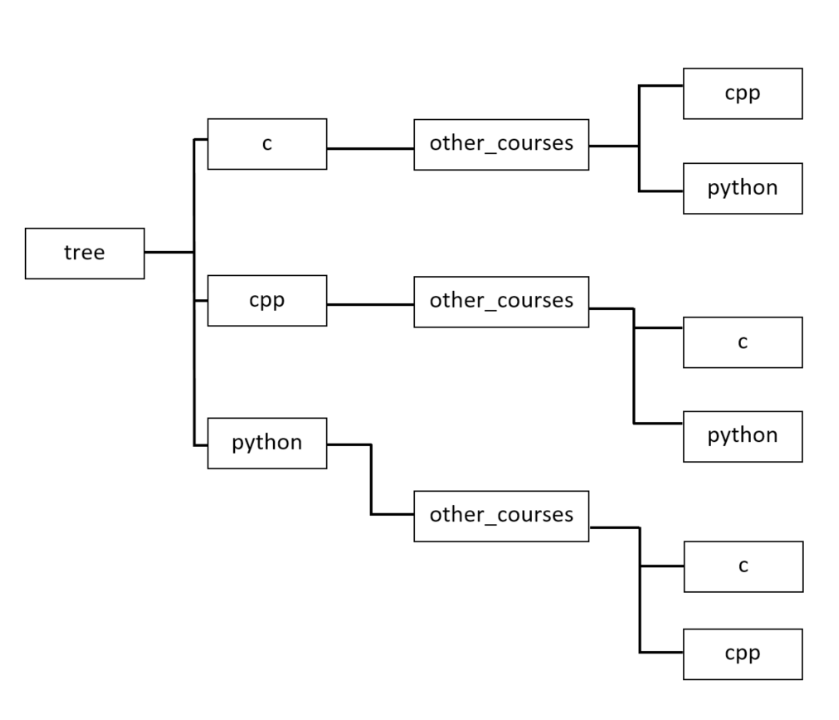

Your program should meet the following requirements:

1. Write a function or method called find that takes two arguments called path and dir. The path argument should accept a relative or absolute path to a directory where the search should start, while the dir argument should be the name of a directory that you want to find in the given path. Your program should display the absolute paths if it finds a directory with the given name.
2. The directory search should be done recursively. This means that the search should also include all subdirectories in the given path.

**Example input:**

> path="./tree", dir="python"

**Example output:**

>.../tree/python   
.../tree/cpp/other_courses/python   
.../tree/c/other_courses/python   

In [ ]:
import os

# # print all dirs in current working location
# print(*list(os.listdir()), sep="\n")

# create test directory structure according to the challenge model
for dir in ["c", "cpp", "python"]:
    if dir == "c":
        for subdir in ["cpp", "python"]:
            os.makedirs(f"tree/{dir}/other_courses/{subdir}", exist_ok=True)  # overwrite if dir exists
    if dir == "cpp":
        for subdir in ["c", "python"]:
            os.makedirs(f"tree/{dir}/other_courses/{subdir}", exist_ok=True)
    elif dir == "python":
        for subdir in ["c", "cpp"]:
            os.makedirs(f"tree/{dir}/other_courses/{subdir}", exist_ok=True)

print(f"[DEBUG] These are the created dirs:")
for root, dirs, files in os.walk("tree"):
    if not dirs:  # check if dir is empty == empty dirs are path to final subdirs
        print(".../" + root)


# create a function that searches for a dir in a give path
def find_dir(path: str="", dir: str=""):
    print(f"\n[INFO] Searching in path {path} for dir {dir}:")

    for root, dirs, files in os.walk(path):
        if dir in dirs:
        # for subdir in dirs:
            print(".." + os.path.join(root, subdir))


# find a dir in the given path
find_dir("./tree", dir="python")
find_dir("./tree", dir="cpp")
find_dir("./tree/python", dir="c")


[DEBUG] These are the created dirs:
.../tree/python/other_courses/c
.../tree/python/other_courses/cpp
.../tree/c/other_courses/python
.../tree/c/other_courses/cpp
.../tree/cpp/other_courses/python
.../tree/cpp/other_courses/c

[INFO] Searching in path ./tree for dir python:
.../tree/cpp
.../tree/c/other_courses/cpp
.../tree/cpp/other_courses/cpp

[INFO] Searching in path ./tree for dir cpp:
.../tree/cpp
.../tree/python/other_courses/cpp
.../tree/c/other_courses/cpp

[INFO] Searching in path ./tree/python for dir c:
.../tree/python/other_courses/cpp


## 4.3.1.17 LAB: Evaluating Students' Results

`LAB`

**Estimated time**   
30-90 minutes

**Level of difficulty**   
Medium

**Objectives**   
* improve the student's skills in operating with files (reading)
* perfecting the student's abilities in defining and using self-defined exceptions and dictionaries.

**Scenario**   
Prof. Jekyll conducts classes with students and regularly makes notes in a text file. Each line of the file contains three elements: the student's first name, the student's last name, and the number of point the student received during certain classes.

The elements are separated with white spaces. Each student may appear more than once inside Prof. Jekyll's file.

The file may look as follows:

>John	Smith	5   
Anna	Boleyn	4.5   
John	Smith	2   
Anna	Boleyn	11   
Andrew	Cox	1.5   

_samplefile.txt_

Your task is to write a program which:

* asks the user for Prof. Jekyll's file name;
* reads the file contents and counts the sum of the received points for each student;
* prints a simple (but sorted) report, just like this one:

>Andrew Cox 	 1.5   
Anna Boleyn 	 15.5   
John Smith 	 7.0   

_output_


Note:

* your program must be fully protected against all possible failures: the file's non-existence, the file's emptiness, or any input data failures; encountering any data error should cause immediate program termination, and the erroneous should be presented to the user;
* implement and use your own exceptions hierarchy - we've presented it in the editor; the second exception should be raised when a bad line is detect, and the third when the source file exists but is empty.

**Tip:** Use a dictionary to store the students' data.

In [ ]:
from os import path


class StudentsDataException(Exception):  # file doesn't exist
    def __init__(self, message):
        super().__init__(message)


class BadLine(StudentsDataException):  # file data input is NOK
    pass


class FileEmpty(StudentsDataException):  # file exists, but it's empty
    pass


# write the samplefile.txt
# samplefile_contents = ""  # test empty file Exception
samplefile_contents = """John	Smith	5
Anna	Boleyn	4.5
John	Smith	2
Anna	Boleyn	11
Andrew	Cox	1.5"""

with open("samplefile.txt", "wt") as f:
    f.write(samplefile_contents)


# asks the user for Prof. Jekyll's file name;
try:
    src = input("Input the file name (e.g., samplefile.txt): ")
    if not path.isfile(src):
        raise StudentsDataException("File not found!")
except StudentsDataException as e:
    print(f"The input file could not be read: {e}")
    exit(e)

# check if file is empty
try:
    if (
        path.getsize(src) == 0
    ):  # can replace with 'data = f.readlines()' and check if 'len(data) == 0'
        raise FileEmpty("File is empty!")
except FileEmpty as e:
    print(f"Encountered an error with the input file contents: {e}")
    exit(e)

# check the number of lines in the input file
with open(src, "rt") as f:
    data = f.readlines()
print(f"\nThe file '{src}' contains {len(data)} lines")

# the original report is
print(f"\nThe original report from file '{src}' is:")
print(data, "\n")

# reads the file contents and counts the sum of the received points for each student;
report = dict()
for line in open(src, "rt"):
    student = line.split()
    student_name = student[0] + " " + student[1]
    student_points = student[2]

    # try to convert the student's score into a number
    try:
        student_points = float(student_points)
    except ValueError as e:
        try:
            raise BadLine("Invalid data for the student points.")
        except BadLine as e:
            print(f"Encountered an error with student's {student_name} points: {e}")
            exit(e)

    # if student is not in report, create new key-value pair
    if student_name not in report.keys():
        report[student_name] = student_points
    # ... else add the new points to the existing student points
    else:
        report[student_name] += student_points

# prints a simple (but sorted) report
sorted_report = dict(
    sorted(
        report.items(),
        key=lambda key: key[0],  # sort by key (student name)
        reverse=False,
    )
)

print(f"\nThe sorted report from file '{src}' is:")
for student, points in sorted_report.items():
    print(f"{student:<13} {points:>5}")


Input the file name (e.g., samplefile.txt): samplefile.txt

The file 'samplefile.txt' contains 5 lines

The original report from file 'samplefile.txt' is:
['John\tSmith\t5\n', 'Anna\tBoleyn\t4.5\n', 'John\tSmith\t2\n', 'Anna\tBoleyn\t11\n', 'Andrew\tCox\t1.5'] 


The sorted report from file 'samplefile.txt' is:
Andrew Cox      1.5
Anna Boleyn    15.5
John Smith      7.0


## 4.3.1.16 LAB: Sorted Character Frequency Histogram

`LAB`

**Estimated time**   
15-30 minutes

**Level of difficulty**   
Medium

**Prerequisites**   
4.3.1.15

**Objectives**   
* improve the student's skills in operating with files (reading/writing)
* using lambdas to change the sort order.

**Scenario**   
The previous code needs to be improved. It's okay, but it has to be better.

Your task is to make some amendments, which generate the following results:

* the output histogram will be sorted based on the characters' frequency (the bigger counter should be presented first)
* the histogram should be sent to a file with the same name as the input one, but with the suffix '.hist' (it should be concatenated to the original name)

Assuming that the input file contains just one line filled with:

> cBabAa

*samplefile.txt*

... the expected output should look as follows:

> a -> 3   
> b -> 2   
> c -> 1   

*output*

**Tip**: Use a lambda to change the sort order.

In [ ]:
from os import strerror


# create the `samplefile.txt` containing the `aBc` string
dst = './samplefile.txt'
try:
  with open(dst, 'wt') as fw:
    fw.write('aBcacc')
except IOError as e:
  print(f"Cannot write to file {dst}: {strerror(e.errno)}")
  exit(e.errno)

# ask the user for the input file's name
src = input("Enter the source file name (e.g., samplefile.txt): ")

# read input file and count the latin letters (ignore case)
char_frequency = dict()
try:
  with open(src, 'rt') as fo:
    for line in fo.readlines():
      for char in line:
        char = char.lower()
        if char == '\n':  # if char is `\n` convert it to Line Feed (LF)
            char = 'LF'
        if char == ' ':
            char = 'space'
        if char not in char_frequency.keys():
          char_frequency[char] = 1
        else:
          char_frequency[char] += 1
except IOError as e:
  print(f"Cannnot read from file {src}: {strerror(e.errno)}")
  exit(e.errno)

# print the sorted histogram with the letter frequency (c -> 3, a -> 2, b -> 1)
sorted_char_frequency = dict(sorted(
    char_frequency.items(),
    key=lambda item: item[1],  # sort by dict values
    reverse=True)  # sort in descending order
)
for char, frequency in sorted_char_frequency.items():
  print(f"{char} -> {frequency}")

# output the histogram to the <source_file_name> + '.hist' suffix
histogram_dst = src + '.hist'
try:
  with open(histogram_dst, 'wt') as fw:
    # use enumerate to check end of iteration -> no `\n` for the last line
    for idx, (char, frequency) in enumerate(sorted_char_frequency.items()):
      line = f"{char} -> {frequency}"
      if idx != len(sorted_char_frequency) - 1:  # if not last line, append '\n'
        line += "\n"
      fw.write(line)
except IOError as e:
  print(f"Cannot write to file {histogram_dst}: {strerror(e.errno)}")
  exit(e.errno)


Enter the source file name (e.g., samplefile.txt): sample_data/README.md
space -> 112
a -> 77
s -> 62
i -> 57
t -> 56
e -> 53
o -> 39
n -> 39
c -> 31
r -> 30
d -> 27
/ -> 27
. -> 22
l -> 21
m -> 20
lf -> 19
h -> 18
b -> 18
p -> 16
g -> 15
u -> 13
f -> 11
y -> 9
_ -> 9
1 -> 9
w -> 8
v -> 8
: -> 8
9 -> 7
- -> 7
7 -> 7
` -> 6
* -> 5
( -> 5
) -> 5
2 -> 5
3 -> 5
8 -> 5
0 -> 4
k -> 4
j -> 4
4 -> 4
[ -> 3
] -> 3
' -> 3
5 -> 3
; -> 2
, -> 2
q -> 2
6 -> 2
x -> 1
% -> 1
z -> 1


## 4.3.1.15 LAB: Character Frequency Histogram

`LAB`

**Estimated time**  
30-60 minutes

**Level of difficulty**
Medium

**Objectives**  
improving the student's skills in operating with files (reading)
using data collections for counting numerous data.

**Scenario**   
A text file contains some text (nothing unusual) but we need to know how often (or how rare) each letter appears in the text. Such an analysis may be useful in cryptography, so we want to be able to do that in reference to the Latin alphabet.

Your task is to write a program which:

* asks the user for the input file's name;
* reads the file (if possible) and counts all the Latin letters (lower- and upper-case letters are treated as equal)
* prints a simple histogram in alphabetical order (only non-zero counts should be presented)
Create a test file for the code, and check if your histogram contains valid results.

Assuming that the test file contains just one line filled with:

>aBc

*samplefile.txt*

the expected output should look as follows:

> a -> 1  
> b -> 1  
> c -> 1  

*output*

**Tip**: We think that a dictionary is a perfect data collection medium for storing the counts. The letters may be keys while the counters can be values.

In [ ]:
from os import strerror


# create the `samplefile.txt` containing the `aBc` string
dst = './samplefile.txt'
try:
    with open(dst, 'wt') as fw:
        fw.write('aBcacc')
except IOError as e:
    print(f"Cannot write to file {dst}: {strerror(e.errno)}")
    exit(e.errno)

# ask the user for the input file's name
src = input("Enter the source file name (e.g., samplefile.txt): ")

# read input file and count the latin letters (ignore case)
char_frequency = dict()
try:
    with open(src, 'rt') as fo:
        for line in fo.readlines():
            for char in line:
                char = char.lower()
                if char not in char_frequency.keys():
                    char_frequency[char] = 1
                else:
                    char_frequency[char] += 1
except IOError as e:
    print(f"Cannnot read from file {src}: {strerror(e.errno)}")
    exit(e.errno)

# print histogram with letter frequency (a -> 2, b -> 1, c -> 3)
for char, frequency in char_frequency.items():
    print(f"{char} -> {frequency}")


Enter the source file name (e.g., samplefile.txt): sample_data/README.md
t -> 56
h -> 18
i -> 57
s -> 62
  -> 112
d -> 27
r -> 30
e -> 53
c -> 31
o -> 39
y -> 9
n -> 39
l -> 21
u -> 13
a -> 77
f -> 11
w -> 8
m -> 20
p -> 16
g -> 15
. -> 22

 -> 19
* -> 5
` -> 6
_ -> 9
v -> 8
1 -> 9
9 -> 7
0 -> 4
; -> 2
b -> 18
: -> 8
/ -> 27
- -> 7
[ -> 3
] -> 3
( -> 5
k -> 4
) -> 5
, -> 2
x -> 1
j -> 4
' -> 3
q -> 2
% -> 1
2 -> 5
7 -> 7
3 -> 5
6 -> 2
8 -> 5
z -> 1
4 -> 4
5 -> 3


## 4.3.1.14 Working with Real Files - Copy File

In [ ]:
from os import strerror


srcname = input("Enter the source file name: ")
try:
    src = open(srcname, 'rb')
except IOError as e:
    print("Cannot open the source file: ", strerror(e.errno))
    exit(e.errno)

dstname = input("Enter the destination file name: ")
try:
    dst = open(dstname, 'wb')
except Exception as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    src.close()
    exit(e.errno)

# buffer = bytearray(65536)
buffer = bytearray(512)
total  = 0
try:
    readin = src.readinto(buffer)  # read first chunk from src up to buffer size
    counter = 1
    while readin > 0:  # repeat until all the src content is read
        print(f"[DEBUG] In pass {counter} read {readin} bytes")  # returns an int (bytes read from src)
        written = dst.write(buffer[:readin])  # buffer size sliced by readin value (e.g., 512 Bytes sliced by 418)
        total += written  # count number of bytes written to dst
        readin = src.readinto(buffer)  # read next chunk of data from src
        counter += 1
except IOError as e:
    print("Cannot create the destination file: ", strerror(e.errno))
    exit(e.errno)

print(total,'byte(s) succesfully written')
src.close()
dst.close()


Enter the source file name: sample_data/README.md
Enter the destination file name: sample_data/README.md.bak
[DEBUG] In pass 1 read 512 bytes
[DEBUG] In pass 2 read 418 bytes
930 byte(s) succesfully written


## Store the Capital Letters A..Z as a `bitearray` and Read them as Characters

In [ ]:
from os import strerror


data = bytearray(26)
for i in range(len(data)):
    data[i] = 65 + i  # numbers that represent the capital letters A..Z in ASCII

try:
    bf = open('file.bin', 'wb')
    bf.write(data)
    bf.close()
except IOError as e:
    print("I/O error occurred:", strerror(e.errno))

# Your code that reads bytes from the stream should go here.
with open('file.bin', 'rb') as bf:
    bf.readinto(data)

    for b in data:
        print(chr(b), end=' ')


A B C D E F G H I J K L M N O P Q R S T U V W X Y Z 

## Print the First 16 values in Decimal, Binary, Hexadecimal and Octal

In [ ]:
data = bytearray(16)
data = [i for i in range(len(data))]
space = ""
print(f"Decimal | Binary {space:>3s} | Hexadecimal | Octal")
print("-" * 42)
for b in data:
    print(f"{b:>7d} | {b:#010b} | {hex(b):>11s} | {oct(b)[2:]}")


Decimal | Binary     | Hexadecimal | Octal
------------------------------------------
      0 | 0b00000000 |         0x0 | 0
      1 | 0b00000001 |         0x1 | 1
      2 | 0b00000010 |         0x2 | 2
      3 | 0b00000011 |         0x3 | 3
      4 | 0b00000100 |         0x4 | 4
      5 | 0b00000101 |         0x5 | 5
      6 | 0b00000110 |         0x6 | 6
      7 | 0b00000111 |         0x7 | 7
      8 | 0b00001000 |         0x8 | 10
      9 | 0b00001001 |         0x9 | 11
     10 | 0b00001010 |         0xa | 12
     11 | 0b00001011 |         0xb | 13
     12 | 0b00001100 |         0xc | 14
     13 | 0b00001101 |         0xd | 15
     14 | 0b00001110 |         0xe | 16
     15 | 0b00001111 |         0xf | 17


## 4.3.1.4 Working with Real Files

In [ ]:
# using the stream error for the try/except block
from os import strerror


try:
	ccnt = lcnt = 0
  # for line in iterable object execute __next__ to get the next value
	for line in open('./sample_data/README.md', 'rt'):
		lcnt += 1
		for ch in line:
			print(ch, end='')
			ccnt += 1
	print("\n\nCharacters in file:", ccnt)
	print("Lines in file:     ", lcnt)
except IOError as e:
	print("I/O error occurred: ", strerror(e.errno))


This directory includes a few sample datasets to get you started.

*   `california_housing_data*.csv` is California housing data from the 1990 US
    Census; more information is available at:
    https://developers.google.com/machine-learning/crash-course/california-housing-data-description

*   `mnist_*.csv` is a small sample of the
    [MNIST database](https://en.wikipedia.org/wiki/MNIST_database), which is
    described at: http://yann.lecun.com/exdb/mnist/

*   `anscombe.json` contains a copy of
    [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet); it
    was originally described in

    Anscombe, F. J. (1973). 'Graphs in Statistical Analysis'. American
    Statistician. 27 (1): 17-21. JSTOR 2682899.

    and our copy was prepared by the
    [vega_datasets library](https://github.com/altair-viz/vega_datasets/blob/4f67bdaad10f45e3549984e17e1b3088c731503d/vega_datasets/_data/anscombe.json).


Characters in file: 930
Lines in file:      19


## 4.2.1.11 Processing Files @Python Institute

In [ ]:
from os import strerror


try:
    s = open("c:/users/user/Desktop/file.txt", "rt")
    # Actual processing goes here.
    s.close()
except Exception as exc:
    # using `strerror` to map the error number to a string description of the error
    print("The file could not be opened:", strerror(exc.errno))


The file could not be opened: No such file or directory


## 8. Create HTML Tags Using `Closures`

In [ ]:
def tag(tg):
  tg2 = tg
  tg2 = tg[0] + '/' + tg[1:]
  def inner(str):
    return tg + str + tg2
  return inner

b_tag = tag('<b>')
print(b_tag('Monty Python'))

h1_tag = tag('<h1>')
print(h1_tag('Monty Python'))


<b>Monty Python</b>
<h1>Monty Python</h1>


In [ ]:
# # JavaScript
# function tag(tg){
#     tg2 = tg;
#     tg2 = tg.slice(0, 1) + '/' + tg.slice(1);
#     return function(str) {
#         return tg + str + tg2;
#     }
# };

# const b_tag = tag('<b>');
# console.log(b_tag('Octavian Augustus'));


## 4.1.1.14 Generators and Closures PCAP@Python Institute

In [ ]:
def make_closure(par):  # take in parameter `p` (e.g., values 2 and 3)
    loc = par
    def power(p):
        return p ** loc  # raise parameter `p` to the power `loc`
    return power


fsqr = make_closure(2)  # create closure that takes the argument `2`
fcub = make_closure(3)  # create closure that takes the argument `3`

for i in range(5):
    print(f"i = {i} | i ** 2 = {fsqr(i)} | i ** 3 = {fcub(i)}")


i = 0 | i ** 2 = 0 | i ** 3 = 0
i = 1 | i ** 2 = 1 | i ** 3 = 1
i = 2 | i ** 2 = 4 | i ** 3 = 8
i = 3 | i ** 2 = 9 | i ** 3 = 27
i = 4 | i ** 2 = 16 | i ** 3 = 64


## Print the Alphabet Using a Generator Class

In [ ]:
class Alphabet:
  def __init__(self):
    self.letters = "abcdefghijklmnopqrstuvwxyz"
    self.pos = 0
  def __iter__(self):
    return self
  def __next__(self):
    if self.pos == len(self.letters):
      raise StopIteration
    self.pos += 1
    return self.letters[self.pos - 1]

alphabet = Alphabet()
for letter in alphabet:
  print(letter, end=' ')


a b c d e f g h i j k l m n o p q r s t u v w x y z 

## 4.1.1.8 Generators and Closures - List and Dict Comprehensions Vs. Generators

In [ ]:
# list comprehension [] containing even numbers trueness in the range 1..10
even_list = [1 if x % 2 == 0 else 0 for x in range(1, 11)]

# dict comprehension {} containing even numbers and their trueness in the range 1..10
even_dict = {x: 1 if x % 2 == 0 else 0 for x in range(1, 11)}

# generator () containing even numbers trueness in the range 1..10
even_generator = (1 if x % 2 == 0 else 0 for x in range(1, 11))
# print(even_generator)  # prints the generator object
# print(even_generator.__next__())  # generate and print the next value

for v in even_list:
    print(v, end=" ")
print()

for v in even_dict.values():
    print(v, end=" ")
print()

for v in even_generator:
    print(v, end=" ")
print()


0 1 0 1 0 1 0 1 0 1 
0 1 0 1 0 1 0 1 0 1 
0 1 0 1 0 1 0 1 0 1 


## 4.1.1.3 Generators and Closures (Fibonacci)

In [ ]:
class Fib:
    def __init__(self, nn):
        self.__n = nn
        self.__i = 0
        self.__p1 = self.__p2 = 1

    def __iter__(self):
        print("Fib iter")
        return self

    def __next__(self):
        self.__i += 1
        if self.__i > self.__n:
            raise StopIteration
        if self.__i in [1, 2]:
            return 1
        ret = self.__p1 + self.__p2
        self.__p1, self.__p2 = self.__p2, ret
        return ret

class Class:
    def __init__(self, n):
        self.__iter = Fib(n)

    def __iter__(self):
        print("Class iter")
        return self.__iter;


object1 = Fib(8)
for i in object1:
    print(i)

object2 = Class(8)
for i in object2:
    print(i)


Fib iter
1
1
2
3
5
8
13
21
Class iter
1
1
2
3
5
8
13
21


## Python Decorators and Wrappers

In [ ]:
#!/usr/bin/python3
"""
Why decorators?
- modify the fn
- record the fn
- wrap the fn
    - modify the params
    - before/after behavior
    - modify the result
"""


# 1. Decorator that adds an attribute to a fn
def green(fn):
    fn.green = True
    return fn


@green
def add(a, b):
    return a + b


print("Decorator '@green' added attribute is:", add.green)  # prints "True"
print()

# 2. Decorator that remembers the last defined fn
last_fn = None


def remember(fn):
    global last_fn
    last_fn = fn
    return fn


@remember
def add(a, b):
    return a + b


# runs fn "add(1, 2)" and prints "3"
print("Last defined fn is 'add' and running 'last_fn(1, 2)' outputs:", last_fn(1, 2))
print()


# 3. Wrapper that modifies a fn's params
def two_floats(fn):
    def wrapper(a, b):
        a = float(a)
        b = float(b)
        return fn(a, b)

    return wrapper


@two_floats
def add(a, b):
    return a + b


# prints "3.0", a float, instead of "3", an integer
print(
    "The fn 'add(1, 2)' takes in 2 integers, but the wrapper modifies them into floats:",
    add(1, 2),
)
print()


# 4. Decorator that logs (do something before/after the fn call)
my_log = []


def log(fn):
    def wrapper(a, b):
        global my_log
        # arbitrate behavior before the fn is called
        my_log.append(a)
        my_log.append(b)
        # call fn
        result = fn(a, b)
        # arbitrate behavior after the fn was called
        my_log.append(result)
        return result

    return wrapper


@log
def add(a, b):
    return a + b


print(
    "Calling the fn 'add(3, 7)' produces this:\n   - logs this data: ",
    my_log,
    "\n   - returns this output: ",
    add(3, 7),
    sep="",
)
print()


# 5. Modify the return value using a decorator
def round_result(fn):
    def wrapper(a, b):
        return round(fn(a, b))

    return wrapper


@round_result
def add(a, b):
    return a + b


print(
    "Calling 'add(3.7, 1.2)' with the '@round_result' decorator outputs:", add(3.7, 1.2)
)
print()


# 6. Define a fn that generates a decorator
def round_result(places):
    def decorator(fn):
        def wrapper(a, b):
            return round(fn(a, b), places)

        return wrapper

    return decorator


@round_result(2)
def add(a, b):
    return a + b


print(
    "Using a fn that generates a decorator on 'add(3.125, 4.219)' outputs:",
    add(3.125, 4.219),
)
print()


# 7. Combine multiple decorators
my_log.clear()

@green
@log
@remember
@round_result(2)
def add(a, b):
    return a + b


print(
    "Calling the fn 'add(3.14159, 2.71787)' with the decorators '@log',\
 '@round_result(2)', '@remember' and '@green' produces this output:"
)
print(
    "   - logs this data:", my_log, "\n   - returns this data:", add(3.14159, 2.71787)
)
print()


# Debug code
print(
    "Debug code from the video 'Nesting Functions and Decorators (2/2) (Theory of Python)':"
)
print(
    "1. Solved the 'AttributeError' by moving the '@green' decorator to the top:",
    add.green,
)
print(
    "2. Solved the 'not rounded' result by moving the '@round_result(2)' to the bottom:",
    last_fn(3.14159, 2.71787),
)


Decorator '@green' added attribute is: True

Last defined fn is 'add' and running 'last_fn(1, 2)' outputs: 3

The fn 'add(1, 2)' takes in 2 integers, but the wrapper modifies them into floats: 3.0

Calling the fn 'add(3, 7)' produces this:
   - logs this data: [3, 7, 10]
   - returns this output: 10

Calling 'add(3.7, 1.2)' with the '@round_result' decorator outputs: 5

Using a fn that generates a decorator on 'add(3.125, 4.219)' outputs: 7.34

Calling the fn 'add(3.14159, 2.71787)' with the decorators '@log', '@round_result(2)', '@remember' and '@green' produces this output:
   - logs this data: [3.14159, 2.71787, 5.86] 
   - returns this data: 5.86

Debug code from the video 'Nesting Functions and Decorators (2/2) (Theory of Python)':
1. Solved the 'AttributeError' by moving the '@green' decorator to the top: True
2. Solved the 'not rounded' result by moving the '@round_result(2)' to the bottom: 5.86


## Using Decorators and Wrappers to Write a `cache`

In [ ]:
def cache(fn):
    _cache = None

    def wrapper(*args):
        nonlocal _cache
        if _cache == None:
            _cache = fn(*args)
        return _cache

    def clear_cache():
        nonlocal _cache
        _cache = None

    wrapper.clear_cache = clear_cache

    return wrapper


@cache
def add(a, b, clear=False):
    if clear:
        add.clear_cache()
    return a + b


print(add(1, 1))
print(add(1, 2))
print(add(2, 3))

add.clear_cache()
print(add(1, 2))

add.clear_cache()
print(add(2, 3))


2
2
2
3
5


## Find 2 (Complementary) Numbers in an Array that Amount to a Predefined Sum

In [ ]:
%%time
'''
Find 2 numbers a and b in a number list that add up to a specific sum using
a Python 3 set.
'''
def find_comp_in_list(numbers, sum):
  comp = set()
  for number in numbers:
    # if the numbers complement is in the set return True
    if (sum - number) in comp:
      # return a bool and a tuple containing the 2 complementary numbers
      return True, (number, (sum-number))
    # if the numbers complement is not in the set, add the number to the set
    comp.add(number)
  return False


numbers = [1, 2, 4, 4]
sum = 8

res = find_comp_in_list(numbers, sum)
# if res:
#   print("There are 2 complementary numbers", res[1], "that amount to", sum)
# else:
#   print("There are no complementary numbers that amount to", sum)


CPU times: user 0 ns, sys: 5 µs, total: 5 µs
Wall time: 8.34 µs


In [ ]:
%%time
'''
Find 2 numbers a and b in a number list that add up to a specific sum using
2 Python 3 for loops.
'''
def find_comp_in_list(numbers, sum):
  length = len(numbers)
  for i in range(length):
    for j in range(length):
      if i != j and numbers[i] + numbers[j] == sum:
        return True, (numbers[i], numbers[j])
  return False


number_list = [
    [1, 2, 4, 4],
    [1, 2, 4, 5],
    [1, 3, 4, 5],
]
sum = 8

res = find_comp_in_list(number_list[0], sum)

# for numbers in number_list:
#   res = find_comp_in_list(numbers, sum)
#   if res:
#     print("There are 2 complementary numbers", res[1], "in", numbers, "that amount to", sum)
#   else:
#     print("There are no complementary numbers in", numbers, "that amount to", sum)
#   print()


CPU times: user 17 µs, sys: 0 ns, total: 17 µs
Wall time: 20.5 µs


## 3.6.1.8 Exceptions Once Again: Custom Pizzas

In [ ]:
class PizzaError(Exception):
    def __init__(self, pizza="unknown", message=""):
        Exception.__init__(self, message)
        self.pizza = pizza


class TooMuchCheeseError(PizzaError):
    def __init__(self, pizza="unknown", cheese=100, message=""):
        PizzaError.__init__(self, pizza, message)
        self.cheese = cheese


def make_pizza(pizza, cheese):
    if pizza not in italian_pizzas.keys():
        raise PizzaError(pizza, "Not an italian pizza")
    if cheese > 100:
        raise TooMuchCheeseError(pizza, cheese, "Too much cheese")
    print("Pizza ready!")


local_pizzas = {
    "calzone": 0,
    "margherita": 110,
    "mafia": 20,
    "coco": 42,
    }

italian_pizzas = {
    "calzone": 0,
    "margherita": 110,
    "coco": 42,
    }

try:
    assert __name__ == "__main__"

    for pizza, cheese in local_pizzas.items():
        try:
            make_pizza(pizza, cheese)
        except TooMuchCheeseError as tmce:
            print(tmce, ':', tmce.cheese, "grams")
        except PizzaError as pe:
            print(pe, ':', pe.pizza)
        # else:
        #     print("All pizzas were baked!")
        # finally:
        #     print("Baking pizzas is done, but some pizzas might've been lost in the process.")
except:
    print("\nfail")
else:
    print("\nsuccess")
finally:
    print("done")


Pizza ready!
Too much cheese : 110 grams
Not an italian pizza : mafia
Pizza ready!

success
done


In [ ]:
import math

class NewValueError(ValueError):
    def __init__(self, name, color, state):
        self.data = (name, color, state)

try:
    raise NewValueError("Enemy warning", "Red alert", "High readiness")
except NewValueError as nve:
    for arg in nve.args:
        print(arg, end='! ')


Enemy warning! Red alert! High readiness! 

## 3.6.1.4 The BaseException Tree Printed Out

In [ ]:
def print_exception_tree(thisclass, nest = 0):
    if nest > 1:
        print("   |" * (nest - 1), end="")
    if nest > 0:
        print("   +---", end="")

    print(thisclass.__name__)

    for subclass in thisclass.__subclasses__():
        print_exception_tree(subclass, nest + 1)


print("Hierarchy for Built-in exceptions is:")
print_exception_tree(BaseException)


Hierarchy for Built-in exceptions is:
BaseException
   +---Exception
   |   +---TypeError
   |   |   +---MultipartConversionError
   |   |   +---FloatOperation
   |   |   +---UFuncTypeError
   |   |   |   +---UFuncTypeError
   |   |   |   +---UFuncTypeError
   |   |   |   +---UFuncTypeError
   |   |   |   |   +---UFuncTypeError
   |   |   |   |   +---UFuncTypeError
   |   |   +---ConversionError
   |   +---StopAsyncIteration
   |   +---StopIteration
   |   +---ImportError
   |   |   +---ModuleNotFoundError
   |   |   |   +---PackageNotFoundError
   |   |   +---ZipImportError
   |   +---OSError
   |   |   +---ConnectionError
   |   |   |   +---BrokenPipeError
   |   |   |   +---ConnectionAbortedError
   |   |   |   +---ConnectionRefusedError
   |   |   |   +---ConnectionResetError
   |   |   |   |   +---RemoteDisconnected
   |   |   +---BlockingIOError
   |   |   +---ChildProcessError
   |   |   +---FileExistsError
   |   |   +---FileNotFoundError
   |   |   |   +---ExecutableNotFoundEr

## 3.4.1.14 Points On a Plane

`LAB`

**Estimated time**  
30-60 minutes

**Level of difficulty**  
Easy/Medium

**Objectives**  
* improving the student's skills in defining classes from scratch;
* defining and using instance variables;
* defining and using methods.

**Scenario**  
Let's visit a very special place - a plane with the Cartesian coordinate system (you can learn more about this concept here: https://en.wikipedia.org/wiki/Cartesian_coordinate_system).

Each point located on the plane can be described as a pair of coordinates customarily called **x** and **y**. We expect that you are able to write a Python class which stores both coordinates as float numbers. Moreover, we want the objects of this class to evaluate the distances between any of the two points situated on the plane.

The task is rather easy if you employ the function named hypot() (available through the math module) which evaluates the length of the hypotenuse of a right triangle (more details here: https://en.wikipedia.org/wiki/Hypotenuse) and here: https://docs.python.org/3.7/library/math.html#trigonometric-functions.

This is how we imagine the class:

* it's called Point;
* its constructor accepts two arguments (**x** and **y** respectively), both default to zero;
* all the properties should be private;
* the class contains two parameterless methods called `getx()` and `gety()`, which return each of the two coordinates (the coordinates are stored privately, so they cannot be accessed directly from within the object);
* the class provides a method called `distance_from_xy(x,y)`, which calculates and returns the distance between the point stored inside the object and the other point given as a pair of floats;
* the class provides a method called `distance_from_point(point)`, which calculates the distance (like the previous method), but the other point's location is given as another _Point_ class object;

Complete the template we've provided in the editor and run your code and check whether your output looks the same as ours.

**Expected output**  
1.4142135623730951  
1.4142135623730951

In [ ]:
'''
The Euclidean distance between two points of the plane with Cartesian
coordinates (x1, y1) and (x2, y2) is: sqrt((x2 - x1)**2 + (y2 - y1)**2).

https://en.wikipedia.org/wiki/Cartesian_coordinate_system
'''
import math


class Point:
    def __init__(self, x=0.0, y=0.0):
      self.__x = x
      self.__y = y

    def getx(self):
      return self.__x

    def gety(self):
      return self.__y

    def distance_from_xy(self, x, y):
      return math.sqrt((x - self.__x)**2 + (y - self.__y)**2)

    def distance_from_point(self, point):
      return math.sqrt((point.__x - self.__x)**2 + (point.__y - self.__y)**2)


point1 = Point(0, 0)
point2 = Point(1, 1)

print(f"The distance between the point ({point2.getx()}, {point2.gety()}) and\
 the point (2, 0) is {point2.distance_from_xy(2, 0)}.")

print(f"The distance between the point ({point1.getx()}, {point1.gety()}) and\
 the point ({point2.getx()}, {point2.gety()}) is {point1.distance_from_point(point2)}.")


The distance between the point (1, 1) and the point (2, 0) is 1.4142135623730951.
The distance between the point (0, 0) and the point (1, 1) is 1.4142135623730951.


## 3.4.1.15 Triangle

`LAB`

**Estimated time**  
30-60 minutes

**Level of difficulty**  
Medium

**Objectives**    
improving the student's skills in defining classes from scratch;
using composition.

**Scenario**
Now we're going to embed the Point class (see Lab 3.4.1.14) inside another class. Also, we're going to put three points into one class, which will let us define a triangle. How can we do it?

The new class will be called Triangle and this is the list of our expectations:  
* the constructor accepts three arguments - all of them are objects of the Point class;
* the points are stored inside the object as a private list;
* the class provides a parameterless method called perimeter(), which calculates the perimeter of the triangle described by the three points; the perimeter is a sum of all legs' lengths (we mention it for the record, although we are sure that you know it perfectly yourself.)

Complete the template we've provided in the editor. Run your code and check whether the evaluated perimeter is the same as ours.

**Expected output**  
3.414213562373095

In [ ]:
'''
This program can calculate the side lengths, perimeter and the area of a triangle
based on an input that defines the Triangle's 3 vertices in the Cartesian
space:
* each point/vertice has its own (x, y) coordinates such as: Point(3, 2)
* each triangle is composed of 3 points/vertices such as: Triangle(Point(0, 0),
Point(1, 0), Point(0, 1))

The area is calculated using Heron's formula:
* calculate the triangle's 3 sides: a, b, c; use Point.distance_from_point()
* calculate the semiperimeter: s = (a + b + c) / 2; use Triangle.perimeter() / 2
* calculate the area: math.sqrt(s * (s - a) * (s - b) * (s - c))
'''
import math


class Point:
    def __init__(self, x=0.0, y=0.0):
        self.__x = x
        self.__y = y

    def get_point(self):
      return (self.__x, self.__y)

    def getx(self):
      return self.__x

    def gety(self):
      return self.__y

    def distance_from_xy(self, x, y):
      return math.sqrt((x - self.__x)**2 + (y - self.__y)**2)

    def distance_from_point(self, point):
      return math.sqrt((point.__x - self.__x)**2 + (point.__y - self.__y)**2)


class Triangle:
    def __init__(self, vertice1, vertice2, vertice3):
      # define the vertices using Cartesian coordinates (x, y)
      self.__vertice1 = vertice1
      self.__vertice2 = vertice2
      self.__vertice3 = vertice3

      # get the length of the triangle's 3 sides
      v1, v2, v3 = self.__vertice1, self.__vertice2, self.__vertice3
      self.__side1 = v1.distance_from_point(v2)
      self.__side2 = v2.distance_from_point(v3)
      self.__side3 = v3.distance_from_point(v1)

    def __str__(self):
      return f"""This triangle is defined by:
  * 3 sides measuring: {self.__side1:.2f}, {self.__side2:.2f}, {self.__side3:.2f};
  * a perimeter of: {self.perimeter():.2f};
  * an area of: {self.area():.2f}.\n"""

    def perimeter(self):
      return self.__side1 + self.__side2 + self.__side3

    def area(self):
      # 1. calculate the semiperimeter
      s = self.perimeter() / 2
      # 2. calculate the area using Heron's formula
      area = math.sqrt(s * (s - self.__side1) * (s - self.__side2) * (s - self.__side3))
      return area


# Use composition to create 1 Triangle instance based on 3 Point instances (x, y)
triangle = Triangle(Point(0, 0), Point(1, 0), Point(0, 1))
print(triangle)
print(f"The triangle's perimeter is: {triangle.perimeter()}.")
print(f"The triangle's area is: {triangle.area()}.")


This triangle is defined by:
  * 3 sides measuring: 1.00, 1.41, 1.00;
  * a perimeter of: 3.41;
  * an area of: 0.50.

The triangle's perimeter is: 3.414213562373095.
The triangle's area is: 0.49999999999999983.


**[TODO]** Use this Rust code generated by ChatGPT to add an *area()* class method to the *Triangle Class* above:

```rust
fn main() {
    // Define the lengths of the sides of the triangle
    let a: f64 = 5.0;
    let b: f64 = 6.0;
    let c: f64 = 7.0;

    // Calculate the semiperimeter
    let s = (a + b + c) / 2.0;

    // Calculate the area using Heron's formula
    let area = (s * (s - a) * (s - b) * (s - c)).sqrt();

    // Print the result
    println!("The area of the triangle is: {}", area);
}
```

## 3.4.1.13 LAB: Days of the Week

`LAB`

Estimated time
30-60 minutes

Level of difficulty
Easy/Medium

Objectives
* improving the student's skills in defining classes from scratch;
* defining and using instance variables;
*defining and using methods.
Scenario
Your task is to implement a class called Weeker. Yes, your eyes don't deceive you – this name comes from the fact that objects of that class will be able to store and to manipulate the days of the week.

The class constructor accepts one argument – a string. The string represents the name of the day of the week and the only acceptable values must come from the following set:

*Mon Tue Wed Thu Fri Sat Sun*

Invoking the constructor with an argument from outside this set should raise the WeekDayError exception (define it yourself; don't worry, we'll talk about the objective nature of exceptions soon). The class should provide the following facilities:

* objects of the class should be "printable", i.e. they should be able to implicitly convert themselves into strings of the same form as the constructor arguments;
* the class should be equipped with one-parameter methods called `add_days(n)` and `subtract_days(n)`, with n being an integer number and updating the day of week stored inside the object in the way reflecting the change of date by the indicated number of days, forward or backward.
* all object's properties should be private;

Complete the template we've provided in the editor and run your code and check whether your output looks the same as ours.

Expected output
* Mon
* Tue
* Sun
* Sorry, I can't serve your request.

In [ ]:
class WeekDayError(Exception):
    def __init__(self, message):
        super().__init__(message)


class Weeker:
    weekdays = ("Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun")  # indices 0..6
    week_length = len(weekdays)

    def __init__(self, day):
        if not day in self.weekdays:
            raise WeekDayError("Sorry, I can't serve your request.")
        self.day = day

    def __str__(self):
        return f"{self.day}"

    def add_days(self, n):
        # current day index + n days; 0 for Mon + 15 for n => day_index of 15
        day_index = self.weekdays.index(self.day) + n
        # 15 % 7 => 2 with a remainder of 1 => Tue
        self.day = self.weekdays[day_index % self.week_length]

    def subtract_days(self, n):
        # current day index - n days; 1 for Tue - 23 for n => day_index of -22
        day_index = self.weekdays.index(self.day) - n
        # -22 % 7 => -4 (floor division) with a remainder of 6 ((-4)*7 + x = -22) => Sun
        self.day = self.weekdays[day_index % self.week_length]


try:
    weekday = Weeker('Mon')
    print(weekday)

    weekday.add_days(15)
    print(weekday)

    weekday.subtract_days(23)
    print(weekday)

    weekday = Weeker('Monday')
except WeekDayError as e:
    # print("Sorry, I can't serve your request.")
    print(e)
except Exception as e:
    print(e)


Mon
Tue
Sun
Sorry, I can't serve your request.


## 3.4.1.12 The Timer Class

`LAB`

Estimated time
30-60 minutes

Level of difficulty
Easy/Medium

Objectives
improving the student's skills in defining classes from scratch;
defining and using instance variables;
defining and using methods.
Scenario
We need a class able to count seconds. Easy? Not as much as you may think as we're going to have some specific expectations.

Read them carefully as the class you're about write will be used to launch rockets carrying international missions to Mars. It's a great responsibility. We're counting on you!

Your class will be called Timer. Its constructor accepts three arguments representing hours (a value from range [0..23] - we will be using the military time), minutes (from range [0..59]) and seconds (from range [0..59]).

Zero is the default value for all of the above parameters. There is no need to perform any validation checks.

The class itself should provide the following facilities:

objects of the class should be "printable", i.e. they should be able to implicitly convert themselves into strings of the following form: "hh:mm:ss", with leading zeros added when any of the values is less than 10;
the class should be equipped with parameterless methods called next_second() and previous_second(), incrementing the time stored inside objects by +1/-1 second respectively.
Use the following hints:
* all object's properties should be private;
* consider writing a separate function (not method!) to format the time string.

Complete the template we've provided in the editor. Run your code and check whether the output looks the same as ours.

Expected output
* 23:59:59
* 00:00:00
* 23:59:59

In [ ]:
def format_timer(hours, minutes, seconds):
    return f"{hours:02d}:{minutes:02d}:{seconds:02d}"


class Timer:
    def __init__(
            self,
            hours: int = 0,
            minutes: int = 0,
            seconds: int = 0) -> str:
        self.__hours = hours
        self.__minutes = minutes
        self.__seconds = seconds

    def __str__(self):
        # return f"{self.__hours:02d}:{self.__minutes:02d}:{self.__seconds:02d}"
        timer = format_timer(self.__hours, self.__minutes, self.__seconds)
        return timer

    def next_second(self):
        if self.__seconds == 59:
            self.__seconds = 0
            if self.__minutes == 59:
                self.__minutes = 0
                if self.__hours == 23:
                    self.__hours = 0
                else:
                    self.__hours += 1
            else:
                self.__minutes += 1
        else:
            self.__seconds += 1

    def prev_second(self):
        if self.__seconds == 0:
            self.__seconds = 59
            if self.__minutes == 0:
                self.__minutes = 59
                if self.__hours == 0:
                    self.__hours = 23
                else:
                    self.__hours -= 1
            else:
                self.__minutes -= 1
        else:
            self.__seconds -= 1


timer1 = Timer(23, 59, 59)
assert timer1.__str__() == "23:59:59", "Failed!"
print(timer1)
timer1.next_second()
assert timer1.__str__() == "00:00:00", "Failed!"
print(timer1)
timer1.prev_second()
assert timer1.__str__() == "23:59:59", "Failed!"
print(timer1)

print()

timer2 = Timer(0, 0, 0)
try:
  assert timer2.__str__() == "00:00:00", "Failed!"
except Exception as e:
  print(e)
print(timer2)
timer2.prev_second()
assert timer2.__str__() == "23:59:59", "Failed!"
print(timer2)
timer2.next_second()
assert timer2.__str__() == "00:00:00", "Failed!"
print(timer2)


23:59:59
00:00:00
23:59:59

00:00:00
23:59:59
00:00:00


## OOP: Properties @Python Institute

In [ ]:
class ExampleClass:
    def __init__(self, val = 1):
        self.first = val

    def set_second(self, val):
        self.second = val


example_object_1 = ExampleClass()
example_object_2 = ExampleClass(2)

example_object_2.set_second(3)

example_object_3 = ExampleClass(4)
example_object_3.set_second(42)
example_object_3.third = 5

print(example_object_1.__dict__)
print(example_object_2.__dict__)
print(example_object_3.__dict__)
print()

###

class ExampleClassTwo:
    def __init__(self, val = 1):
        self.__first = val

    def set_second(self, val = 2):
        self.__second = val


example_object_1 = ExampleClassTwo()
example_object_2 = ExampleClassTwo(2)

example_object_2.set_second(3)

example_object_3 = ExampleClassTwo(4)
example_object_3.__third = 5


print(example_object_1.__dict__)
print(example_object_2.__dict__)
print(example_object_3.__dict__)
print()

###

class ExampleClassThree:
    counter = 0
    def __init__(self, val = 1):
        self.__first = val
        ExampleClassThree.counter += 1


example_object_1 = ExampleClassThree()
example_object_2 = ExampleClassThree(2)
example_object_3 = ExampleClassThree(4)

print(example_object_1.__dict__, example_object_1.counter)
print(example_object_2.__dict__, example_object_2.counter)
print(example_object_3.__dict__, example_object_3.counter)
print()

###

class Cats:
    __counter = 0
    def __init__(self, val = "Jane Doe", age = 1):
        self.__name = val
        self.__age = age
        Cats.__counter += 1

    def info(self):
        return f"{self.__name} is {self.__age} years old."


cat_1 = Cats("Coco", 8)
cat_2 = Cats("Rosie", 8)
cat_3 = Cats("Zennie", 4)

print(cat_1.__dict__, cat_1._Cats__counter)
print(cat_2.__dict__, cat_2._Cats__counter)
print(cat_3.__dict__, cat_3._Cats__counter)
print(cat_1.info())
print(cat_2.info())
print(cat_3.info())
print()

###

class Sample:
    gamma = 0 # Class variable.
    def __init__(self):
        self.alpha = 1 # Instance variable.
        self.__delta = 3 # Private instance variable.


obj = Sample()
obj.beta = 2  # Another instance variable (existing only inside the "obj" instance.)
print(obj.__dict__, obj.gamma)
print(obj.gamma)
print(Sample.__dict__)

###

class Python:
    population = 1
    victims = 0
    def __init__(self):
        self.length_ft = 3
        self.__venomous = False

# create the `python` instance and check it's attributes
python = Python()
print(python.__dict__)

# negate the `__venomous` private instance attribute
python._Python__venomous = not python._Python__venomous
print(python.__dict__)

# check if the `python` instance has the `constrictor` property
if hasattr(python, "constrictor"):
    print(python.constrictor)
else:
    print(f"The `python` object has no `constrictor` attribute.")


{'first': 1}
{'first': 2, 'second': 3}
{'first': 4, 'second': 42, 'third': 5}

{'_ExampleClassTwo__first': 1}
{'_ExampleClassTwo__first': 2, '_ExampleClassTwo__second': 3}
{'_ExampleClassTwo__first': 4, '__third': 5}

{'_ExampleClassThree__first': 1} 3
{'_ExampleClassThree__first': 2} 3
{'_ExampleClassThree__first': 4} 3

{'_Cats__name': 'Coco', '_Cats__age': 8} 3
{'_Cats__name': 'Rosie', '_Cats__age': 8} 3
{'_Cats__name': 'Zennie', '_Cats__age': 4} 3
Coco is 8 years old.
Rosie is 8 years old.
Zennie is 4 years old.

{'alpha': 1, '_Sample__delta': 3, 'beta': 2} 0
0
{'__module__': '__main__', 'gamma': 0, '__init__': <function Sample.__init__ at 0x7b8324ba76d0>, '__dict__': <attribute '__dict__' of 'Sample' objects>, '__weakref__': <attribute '__weakref__' of 'Sample' objects>, '__doc__': None}
{'length_ft': 3, '_Python__venomous': False}
{'length_ft': 3, '_Python__venomous': True}
The `python` object has no `constrictor` attribute.


## Print an Object's Methods in a Beautified Way @StackOverflow

https://stackoverflow.com/questions/34439/finding-what-methods-a-python-object-has

In [ ]:
def get_methods(object, spacing=20):
  methodList = []
  # methods = [m for m in dir(object) if not m.startswith('__')]
  for method_name in dir(object):
    try:
        if callable(getattr(object, method_name)):
            methodList.append(str(method_name))
    except Exception:
        methodList.append(str(method_name))
        # pass
  processFunc = (lambda s: ' '.join(s.split())) or (lambda s: s)
  for method in methodList:
    try:
        print(str(method.ljust(spacing)) + ' ' +
              processFunc(str(getattr(object, method).__doc__)[0:90]))
    except Exception:
        print(method.ljust(spacing) + ' ' + ' getattr() failed')

get_methods(python)

__class__            None
__delattr__          Implement delattr(self, name).
__dir__              Default dir() implementation.
__eq__               Return self==value.
__format__           Default object formatter.
__ge__               Return self>=value.
__getattribute__     Return getattr(self, name).
__gt__               Return self>value.
__hash__             Return hash(self).
__init__             None
__init_subclass__    This method is called when a class is subclassed. The default implementation does nothing
__le__               Return self<=value.
__lt__               Return self<value.
__ne__               Return self!=value.
__new__              Create and return a new object. See help(type) for accurate signature.
__reduce__           Helper for pickle.
__reduce_ex__        Helper for pickle.
__repr__             Return repr(self).
__setattr__          Implement setattr(self, name, value).
__sizeof__           Size of object in memory, in bytes.
__str__              Retur

## Queue w Custom Exceptions - Manually Created using OOP @ Python Institute

In [ ]:
import logging


class QueueError(LookupError):  # inherit from the `Exception` class
    def __init__(self, message):
        super().__init__(message)


class Queue:
    def __init__(self):
        self.__queue = []  # create the queue

    def put(self, element):
        self.__queue.append(element)  # insert `element` at the end of the queue

    def get(self):
        if not self.__queue:
            raise QueueError("Queue is empty")
        value = self.__queue[0]
        del self.__queue[0]  # remove `element` at the start of the queue
        return value


que = Queue()

que.put(1)
que.put("dog")
que.put(False)
que.put(["a", "b", "c"])
que.put("cat")

logging.basicConfig(
    filename='./example.log',
    encoding='utf-8',
    level=logging.DEBUG,
    )

try:
    for i in range(4):
        print(f"The next element in the queue is: `{que.get()}`")
    print(f"The next element in the queue is: `{que.get()}`")
    print(que.get())
except QueueError as e:
    print(f"Queue Error: `{e}`")
    logging.error(e)
except Exception as e:
    print(f"Your code failed: `{e}`")


ERROR:root:Queue is empty


The next element in the queue is: `1`
The next element in the queue is: `dog`
The next element in the queue is: `False`
The next element in the queue is: `['a', 'b', 'c']`
The next element in the queue is: `cat`
Queue Error: `Queue is empty`


In [ ]:
!ls

sample_data


In [ ]:
class QueueError(LookupError):
    def __init__(self, message):
        super().__init__(message)

class Queue:
    def __init__(self):
        self.__queue = []  # create the queue

    def put(self, elem):
        self.__queue.insert(0, elem)  # insert `elem` at the end of the queue

    def get(self):
        if len(self.__queue) > 0:
            elem = self.__queue[-1]
            del self.__queue[-1]
            return elem
        else:
            raise QueueError

class SuperQueue(Queue):
    def __init__(self):
        super().__init__()
        self.__empty = True

    def put(self, elem):
        super().put(elem)
        self.__empty = False

    def get(self):
        value = super().get()
        if len(self._Queue__queue) == 0:
            self.__empty = True
        return value

    def isempty(self):
        return self.__empty

que = SuperQueue()
que.put(1)
que.put("dog")
que.put(False)
for i in range(4):
    if not que.isempty():
        print(que.get())
    else:
        print("The queue is empty.")


1
dog
False
The queue is empty.


## Stack - Manually Created Using OOP @ Python Institute

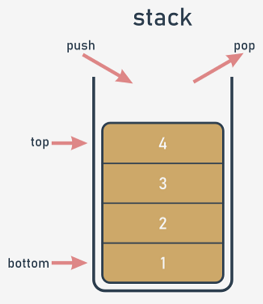

In [ ]:
class Stack:
    def __init__(self):
        self.__stack_list = []  # encapsulation using private attributes (traits)


    def push(self, val):
        self.__stack_list.append(val)


    def pop(self):
        val = self.__stack_list[-1]
        del self.__stack_list[-1]
        return val


class AddingStack(Stack):  # inheritance from the `Stack` superclass
    def __init__(self):
        super().__init__()  # equivalent to calling the constructor on the superclass: `Stack.__init__(self)`
        self.__sum = 0

    def get_sum(self):  # abstraction by exposing the `get_sum()` class method and not its inner workings
        return self.__sum

    def push(self, val):  # polymorphism using a method w/ the same name, but different functionality
        self.__sum += val
        Stack.push(self, val)

    def pop(self):
        val = Stack.pop(self)
        self.__sum -= val
        return val


stack_object = AddingStack()

for i in range(5):
    stack_object.push(i)
    print(f"[INFO] Pushing the value `{i}` to the stack.")

print(f"[INFO] The sum of the items inside the stack is {stack_object.get_sum()}")

for i in range(5):
    print(f"[INFO] Popping the value `{stack_object.pop()}` from the stack.")

print(f"[INFO] The sum of the items inside the stack is {stack_object.get_sum()}")


[INFO] Pushing the value `0` to the stack.
[INFO] Pushing the value `1` to the stack.
[INFO] Pushing the value `2` to the stack.
[INFO] Pushing the value `3` to the stack.
[INFO] Pushing the value `4` to the stack.
[INFO] The sum of the items inside the stack is 10
[INFO] Popping the value `4` from the stack.
[INFO] Popping the value `3` from the stack.
[INFO] Popping the value `2` from the stack.
[INFO] Popping the value `1` from the stack.
[INFO] Popping the value `0` from the stack.
[INFO] The sum of the items inside the stack is 0


In [ ]:
"""
We've showed you recently how to extend Stack possibilities
by defining a new class (i.e., a subclass) which retains all
inherited traits and adds some new ones.

Your task is to extend the Stack class behavior in such a way
so that the class is able to count all the elements that are
pushed and popped (we assume that counting pops is enough).
Use the Stack class we've provided in the editor.

Follow the hints:

introduce a property designed to count pop operations and name
it in a way which guarantees hiding it; initialize it to zero
inside the constructor; provide a method which returns the value
currently assigned to the counter (name it get_counter()).
Complete the code in the editor. Run it to check whether your
code outputs 100.
"""
class Stack:
    def __init__(self):
        self.__stack = []

    def push(self, val):
        self.__stack.append(val)

    def pop(self):
        val = self.__stack[-1]
        del self.__stack[-1]
        return val


class CountingStack(Stack):
    def __init__(self):
        # Stack.__init__(self)
        super().__init__()
        self.__counter = 0  # counts both pushed and popped elements

    def get_counter(self):
        return self.__counter

    def push(self, val):
        self.__counter += 1  # count elements pushed onto the stack
        # Stack.push(self, val)
        super().push(val)

    def pop(self):
        self.__counter += 1  # count elements popped from the stack
        # val = Stack.pop(self)
        val = super().pop()
        return val


stk = CountingStack()

for i in range(100):
    stk.push(i)
    stk.pop()

print(stk.get_counter())


200


## Read and Check Sudoku Tiles (3x3)

In [ ]:
from typing import List


SUDOKU_ONE = """295743861
431865927
876192543
387459216
612387495
549216738
763524189
928671354
154938672"""

SUDOKU_TWO = """195743862
431865927
876192543
387459216
612387495
549216738
763524189
928671354
254938671"""


def read_sudoku_tiles(sudoku_list: List[str]) -> str:
  tile = 0
  tiles = {}
  while tile < 9:
    row_start = (tile // 3) * 3
    row_end = row_start + 3
    col_start = (tile % 3) * 3
    col_end = col_start + 3

    tile_values = ""
    for row in sudoku_list[row_start:row_end]:
      tile_values += (row[col_start:col_end])

    tiles[tile] = "".join(sorted(tile_values))
    tile += 1

  result = check_sudoku_tiles(tiles)

  return "Yes" if result else "No"


def check_sudoku_tiles(sudoku_tiles: dict[List[str]]) -> bool:
  for tile in sudoku_tiles.values():
    if tile != "123456789":
      return False

    return True


print("This program checks if a Sudoku table is valid.\n\
All 9 tiles (3x3) have to contain the digits 0..9.")
sudoku_sample_one = SUDOKU_ONE.split("\n")
print(f"\n[INFO] The first sample Sudoku is:")
print(*sudoku_sample_one, sep="\n")

sudoku_sample_two = SUDOKU_TWO.split("\n")
print(f"\n[INFO] The second sample Sudoku is:")
print(*sudoku_sample_two, sep="\n")

output = read_sudoku_tiles(sudoku_sample_one)
print(f"\n[OUTPUT] The first sample Sudoku is a `{output}`.")

output = read_sudoku_tiles(sudoku_sample_two)
print(f"[OUTPUT] The second sample Sudoku is a `{output}`.")


This program checks if a Sudoku table is valid.
All 9 tiles (3x3) have to contain the digits 0..9.

[INFO] The first sample Sudoku is:
295743861
431865927
876192543
387459216
612387495
549216738
763524189
928671354
154938672

[INFO] The second sample Sudoku is:
195743862
431865927
876192543
387459216
612387495
549216738
763524189
928671354
254938671

[OUTPUT] The first sample Sudoku is a `Yes`.
[OUTPUT] The second sample Sudoku is a `No`.


## Find String 1 in String 2 / Find Word

In [ ]:
"""
Let's play a game. We will give you two strings: one being a word
(e.g., "dog") and the second being a combination of any characters.

Your task is to write a program which answers the following question:
are the characters comprising the first string hidden inside the
second string?

For example:
* if the second string is given as "vcxzxduybfdsobywuefgas", the answer
is yes;
* if the second string is "vcxzxdcybfdstbywuefsas", the answer is no
(as there are neither the letters "d", "o", or "g", in this order)

Hints:
*you should use the two-argument variants of the pos() functions inside
your code;
* don't worry about case sensitivity.

Test 1 => outputs Yes
* donor
* Nabucodonosor

Test 2 => outputs No
* donut
* Nabucodonosor
"""
def find_word(string_1: str, string_2: str) -> str:
    chars_found = 0
    for char in string_1.upper():
        # print(f"[INFO] Searching for char {char}...")
        if string_2.upper().find(char) != -1:
            # print(f"[INFO] Found char {char}!")
            chars_found += 1

    if chars_found == len(string_1):
        return "found"

    return "not found"


string_1 = input("Write the first string: ")
string_2 = input("Write the second string: ")
output = find_word(string_1, string_2)
print(f"The characters of `{string_1}` were {output} in `{string_2}`.")


Write the first string: cat
Write the second string: catnip
The characters of `cat` were found in `catnip`.


## Digit of Life

In [ ]:
"""
Some say that the Digit of Life is a digit evaluated using somebody's birthday.
It's simple - you just need to sum all the digits of the date. If the result
contains more than one digit, you have to repeat the addition until you get
exactly one digit. For example:

1 January 2017 = 2017 01 01
2 + 0 + 1 + 7 + 0 + 1 + 0 + 1 = 12
1 + 2 = 3
3 is the digit we searched for and found.

Your task is to write a program which:
* asks the user her/his birthday (in the format YYYYMMDD, or YYYYDDMM, or
MMDDYYYY - actually, the order of the digits doesn't matter)
* outputs the Digit of Life for the date.

Test your code using the data we've provided:
* 19991229 => 6
* 20000101 => 4
"""
def digit_of_life(birthday: str) -> int:
    # if len of birthday is higher than 1 (e.g., 12) run this loop
    while len(birthday) > 1:
        digit = 0
        for char in birthday:
            # sum of all digits in the birthday string
            digit += int(char)
        # birthday is re-assigned the resulting digit as a string
        birthday = str(digit)

    return digit

while True:
    birthday = input("Enter your birthday in the format YYYYMMDD, or YYYYDDMM,\
     or MMDDYYYY: ")
    if len(birthday) == 8 and int(birthday) > 0:
        break

output = digit_of_life(birthday)
print(f"Your `Digit of Life` is `{output}`.")


Enter your birthday in the format YYYYMMDD, or YYYYDDMM,     or MMDDYYYY: 19860201
Your `Digit of Life` is `9`.


## Check if 2 Strings are Anagrams

In [ ]:
"""
This program takes 2 user inputs (strings) and checks if they are
anagrams.

An anagram is a new word formed by rearranging the letters of a word,
using all the original letters exactly once. For example, the phrases
"rail safety" and "fairy tales" are anagrams, while "I am" and "You are"
are not.
"""
def check_anagram(text_1: str, text_2: str):
    result = sorted(text_1.strip().lower()) == sorted(text_2.strip().lower())
    if result:
        return f"The 2 strings are anagrams"
    return f"The 2 strings are not anagrams"


try:
  assert check_anagram("Listen", "Silent") == "The 2 strings are anagrams"
  assert check_anagram("modern", "norman") == "The 2 strings are not anagrams"
  print("The built-in tests passed!\n")
except:
  print("The unit tests failed!")

text_1 = input("Input text 1: ")
text_2 = input("Input text 2: ")

output = check_anagram(text_1, text_2)
print(output)


The built-in tests passed!

Input text 1: Octa
Input text 2: taco
The 2 strings are anagrams


## Caesar Cipher

In [ ]:
"""
This program is an improved version of the Caesar Cipher.

It takes as input 2 user arguments:
* line of text to encrypt
* a shift value (int from the range 1..25)
... and it prints out the encoded text.
"""

def encrypt_message(text, shift_value):
    cipher = ""

    for char in text:
        if not char.isalpha():
            cipher += char
            continue

        code = ord(char.upper()) + shift_value

        if code > ord("Z"):
            code = ord("A") + (code % ord("Z")) - 1

        if char.isupper():
            cipher += chr(code).upper()
        elif char.islower():
            cipher += chr(code).lower()

    return cipher


text = input("Text you want to encrypt: ")
shift_value = int(input("Cipher encrypt shift value (integer from the range 1..25): "))

print(encrypt_message(text, shift_value))


Text you want to encrypt: Cum e in concediu?
Cipher encrypt shift value (integer from the range 1..25): 3
Fxp h lq frqfhglx?


In [ ]:
# Improved code by Bing@ChatGPT3.5
# Define a function to encrypt a message
def encrypt_message(text, shift_value):
    # Initialize an empty string to store the cipher
    cipher = ""

    # Loop through each character in the text
    for char in text:
        # If the character is not a letter, append it to the cipher unchanged
        if not char.isalpha():
            cipher += char
            continue

        # Convert the character to a number between 0 and 25
        num = ord(char) - ord("A") if char.isupper() else ord(char) - ord("a")

        # Increment the number by the shift value and wrap around if necessary
        num += shift_value
        num %= 26

        # Convert the number back to a character, preserving the original case
        code = chr(num + ord("A")) if char.isupper() else chr(num + ord("a"))

        # Append the encrypted character to the cipher
        cipher += code

    # Return the cipher
    return cipher


# Get the input from the user
text = input("Text you want to encrypt: ")
shift_value = int(input("Cipher encrypt shift value (integer from the range 1..25): "))

# Encrypt the input and print the output
output = encrypt_message(text, shift_value)
print(output)


Text you want to encrypt: Țomanap e cel mai tareee!
Cipher encrypt shift value (integer from the range 1..25): 7
Mvthuhw l jls thp ahylll!


## [Example 2: Generating an Infinite Sequence](https://realpython.com/introduction-to-python-generators/#example-2-generating-an-infinite-sequence)

In [ ]:
def infinite_sequence():
    num = 0
    while True:
        yield num
        num += 1


# for i in infinite_sequence():
#     print(i, end=" ")
#     input("\nPress any key to continue or `Ctrl+C` to end.")

gen = infinite_sequence()
while True:
    print(gen.__next__())  # next(gen)
    input("Press any key to continue or `Ctrl+C` to end.")


0
Press any key to continue or `Ctrl+C` to end.
1
Press any key to continue or `Ctrl+C` to end.
2
Press any key to continue or `Ctrl+C` to end.
3
Press any key to continue or `Ctrl+C` to end.
4
Press any key to continue or `Ctrl+C` to end.
5
Press any key to continue or `Ctrl+C` to end.
6
Press any key to continue or `Ctrl+C` to end.
7


KeyboardInterrupt: ignored

## Number to the power of 2 using Lambda and Map

In [ ]:
def my_print(input):
    return print(input, end=" ")  # use " " instead of "\n" for print


x = list(range(1, 11))  # integer list from 1..10
y = map(lambda i: i**2, x)  # map list of lambda of i to the power of 2

my_print(next(y))  # equivalent to `my_print(y.__next__())`
my_print(next(y))
my_print(next(y))
my_print(next(y))

for number in y:
    my_print(number)


1 4 9 16 25 36 49 64 81 100 

## IBAN Validator @ Python Institute

In [ ]:
"""
Example IBANs:
* British: GB72 HBZU 7006 7212 1253 00
* French: FR76 30003 03620 00020216907 50
* German: DE02100100100152517108
"""
def validate_iban(iban: str) -> str:
  # remove " " from the iban
  iban = iban.replace(" ", "")
  original_iban = iban[:]

  # accept only alpha-numeric chars
  if not iban.isalnum():
      print("You have entered invalid characters.")
  # the min length of an iban in the EU is 15 chars
  elif len(iban) < 15:
      print("IBAN entered is too short.")
  # the max length of an iban in the EU is 31 chars
  elif len(iban) > 31:
      print("IBAN entered is too long.")
  else:
      # move the first 4 chars to the end of the iban
      iban = (iban[4:] + iban[0:4]).upper()
      iban2 = ""
      for ch in iban:
          if ch.isdigit():
              iban2 += ch
          else:
              # convert letters to number representations
              iban2 += str(10 + ord(ch) - ord("A"))
      iban = int(iban2)
      # check remainder of the iban divided by 97
      # 1 = valid iban, 2 = invalid iban
      if iban % 97 == 1:
          return "valid"
      return "invalid"


test_ibans = {
    "British 1": "GB72 HBZU 7006 7212 1253 00",
    "British 2": "GB72 HBZU 7006 7212 1253 01",
    "French": "FR76 30003 03620 00020216907 50",
    "German 1": "DE02100100100152517108",
    "German 2": "DE02100100100152517108",
}

test_ibans_assertions = {
    0: "valid",
    1: "invalid",
    2: "valid",
    3: "valid",
    4: "invalid",
}

iban = input("Please enter IBAN, else the default values will be used: ")

# if no iban is entered, use the ones from the test_ibans dict
if iban == "":
  print("- - " * 13)
  for index, (country, iban) in enumerate(test_ibans.items()):
    output = validate_iban(iban)
    print(f"\033[1m[EXAMPLE {index + 1}]\033[0m {country} IBAN \033[3m{iban}\033[0m is {output}.")

    try:
      assert validate_iban(iban) == test_ibans_assertions[index]
      print(f"{iban} passed the `assert` test.\n")
    except AssertionError:
      print(f"{iban} failed the `assert` test.\n")

Please enter IBAN, else the default values will be used: 
- - - - - - - - - - - - - - - - - - - - - - - - - - 
[EXAMPLE 1] British 1 IBAN GB72 HBZU 7006 7212 1253 00 is valid.
GB72 HBZU 7006 7212 1253 00 passed the `assert` test.

[EXAMPLE 2] British 2 IBAN GB72 HBZU 7006 7212 1253 01 is invalid.
GB72 HBZU 7006 7212 1253 01 passed the `assert` test.

[EXAMPLE 3] French IBAN FR76 30003 03620 00020216907 50 is valid.
FR76 30003 03620 00020216907 50 passed the `assert` test.

[EXAMPLE 4] German 1 IBAN DE02100100100152517108 is valid.
DE02100100100152517108 passed the `assert` test.

[EXAMPLE 5] German 2 IBAN DE02100100100152517108 is valid.
DE02100100100152517108 failed the `assert` test.



## Display Number on Seven-Segments Display

In [ ]:
# https://stackoverflow.com/questions/61809719/python3-print-on-same-line-numbers-in-7-segment-device-format

dict1 = {
    '0':('###','# #','# #','# #','###'),
    '1':(' ##','###',' ##',' ##',' ##'),
    '2':('###','  #','###','#  ','###'),
    '3':('###','  #','###','  #','###'),
    '4':('# #','# #','###','  #','  #'),
    '5':('###','#  ','###','  #','###'),
    '6':('###','#  ','###','# #','###'),
    '7':('###','  #','  #','  #','  #'),
    '8':('###','# #','###','# #','###'),
    '9':('###','# #','###','  #','###')
}

def seven_segments(num):
    # for row in range(len(dict1['0'])):
    #     print(' '.join(dict1[i][row] for i in num))

    # without list comprehension
    for row in range(5):
        line = []
        for i in num:
            if i != ' ':
              line.append(dict1[i][row])
            else:
              line.append(' ')
        print(' '.join(line))

num = input("Type a positive integer number: ")
seven_segments(num)


Type a positive integer number: 13
 ## ###
###   #
 ## ###
 ##   #
 ## ###


In [ ]:
# use the current time with the above seven_segments() function
from datetime import datetime

now = datetime.now()
current_time = now.strftime("%H %M %S")
print(current_time)

seven_segments(current_time)

10 10 05
 ## ###    ## ###   ### ###
### # #   ### # #   # # #  
 ## # #    ## # #   # # ###
 ## # #    ## # #   # #   #
 ## ###    ## ###   ### ###


In [ ]:
#!/usr/bin/env python

'''
Script to display a positive integer number using a
seven-segments display.
'''

from datetime import datetime
# import pytz # module not installed
import time
import os
import shutil


# define a dict containing values between 0..9
dict1 = {
    '0':('###','# #','# #','# #','###'),
    '1':(' ##','###',' ##',' ##',' ##'),
    '2':('###','  #','###','#  ','###'),
    '3':('###','  #','###','  #','###'),
    '4':('# #','# #','###','  #','  #'),
    '5':('###','#  ','###','  #','###'),
    '6':('###','#  ','###','# #','###'),
    '7':('###','  #','  #','  #','  #'),
    '8':('###','# #','###','# #','###'),
    '9':('###','# #','###','  #','###')
}

# convert a string representaiton of an integer to 7 segments
def seven_segments(num):
    # for row in range(len(dict1['0'])):
    #     print(' '.join(dict1[i][row] for i in num))

    # without list comprehension
    for row in range(5):
        line = []
        for i in num:
            if i != ' ':
              line.append(dict1[i][row])
            else:
              line.append(' ')
        columns = shutil.get_terminal_size().columns
        print(' '.join(line).center(columns, ' '))

# use the current time with the above seven_segments() function
# limit runs to `counter` for Google Colab
counter = 0
while True:
    os.system('clear')

    ### requires pytz module
    # timezone = pytz.timezone("Europe/Bucharest")
    # now_utc = datetime.utcnow()
    #now_timezone = now_utc.replace(tzinfo=pytz.utc).astimezone(timezone)
    #current_time = now_timezone.strftime("%H %M %S")

    ### without pytz module
    now = datetime.now()
    current_time = now.strftime("%H %M %S")

    print('\n' * 7)
    seven_segments(current_time)
    time.sleep(1)

    # limit runs to `counter` for Google Colab
    counter += 1
    if counter > 2:
      break










                          ### ###   ### ###    ## ###                           
                          # #   #   # # #     ### #                             
                          # #   #   # # ###    ## ###                           
                          # #   #   # # # #    ## # #                           
                          ###   #   ### ###    ## ###                           








                          ### ###   ### ###    ## ###                           
                          # #   #   # # #     ###   #                           
                          # #   #   # # ###    ##   #                           
                          # #   #   # # # #    ##   #                           
                          ###   #   ### ###    ##   #                           








                          ### ###   ### ###    ## ###                           
                          # #   #   # # #     ### # #                           
    

In [ ]:
!pip show pytz

Name: pytz
Version: 2023.3
Summary: World timezone definitions, modern and historical
Home-page: http://pythonhosted.org/pytz
Author: Stuart Bishop
Author-email: stuart@stuartbishop.net
License: MIT
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: LunarCalendar, pandas, rpy2, yfinance


## Find char(s) in string

In [ ]:
string = 'theta'
items = [
    'eta',
    'et',
    'the',
    'ha',
    ]

for item in items:
    # if string.find(item):
    #     print("Found:", item)
    #     continue
    # print("Didn't find:", item)
    print("Found:", item) if string.find(item) else print("Didn't find:", item)

###

the_text = """A variation of the ordinary lorem ipsum
text has been used in typesetting since the 1960s
or earlier, when it was popularized by advertisements
for Letraset transfer sheets. It was introduced to
the Information Age in the mid-1980s by the Aldus Corporation,
which employed it in graphics and word-processing templates
for its desktop publishing program PageMaker (from Wikipedia)"""

fnd = the_text.find('the')
while fnd != -1:
    print(fnd, ":", the_text[fnd:fnd+21], "...")
    fnd = the_text.find('the', fnd + 1)


Found: eta
Found: et
Didn't find: the
Found: ha
15 : the ordinary lorem ip ...
80 : the 1960s 
or earlier ...
198 : the Information Age i ...
221 : the mid-1980s by the  ...
238 : the Aldus Corporation ...


## Reverse a String Using 5 Methods

In [ ]:
# Decorator function to measure execution time <= need to come back to `decorators` later
import time

def measure_time(original_function):
    def wrapper_function(*args, **kwargs):
        start_time = time.time()
        # result = original_function(*args, **kwargs)
        end_time = time.time()
        elapsed_time = end_time - start_time
        print(f"{original_function.__name__} took {elapsed_time:.2f} seconds to execute.")
        return result
    return wrapper_function

In [ ]:
"""
Reversing some `input_text` char-string using 4 different ways:
* recursion
* recursion and lambda
* built-in `reversed` method & `join` iterator
* while loop & concatenating chars into a new string
* reversed slice
* for loop and concatenating into a new string
"""

input_string = input("Input some text you want reversed: ")

# 1. Recursion
def rev_string(string):
    if string == '':
        return string
    return string[-1] + rev_string(string[:-1])
print(f"1. Recursion: {rev_string(input_string)}")

# 2. Recursion & Lambda
rev_string_lambda = lambda string: string[-1] + rev_string_lambda(string[:-1]) if string != "" else string
print(f"2. Recursion and lambda: {rev_string_lambda(input_string)}")

# 3. built-in `reversed` method & `join` iterator
print("3. Built in `reversed` method and `join` iterator:", "".join(reversed(input_string)))

# 4. while loop & concatenating chars into a new string
length = len(input_string) - 1
rev_some_text = ''
while length >= 0:
    rev_some_text += input_string[length]
    length -=1
print(f"4. While loop: {rev_string_lambda(input_string)}")

# 5. Reversed slice of the string
print(f"5. Reversed slice: {input_string[::-1]}")

# 6. for loop and concatenating into a new string
rev_string_for_loop = ""
for char in input_string:
    rev_string_for_loop = char + rev_string_for_loop
print(f"6. For loop: {rev_string_for_loop}")

Input some text you want reversed: Costin
1. Recursion: nitsoC
2. Recursion and lambda: nitsoC
3. Built in `reversed` method and `join` iterator: nitsoC
4. While loop: nitsoC
5. Reversed slice: nitsoC
6. For loop: nitsoC


## Fibonacci @ Brilliant

Started as a simple Brilliant exercise to generate the first N Fibonacci numbers. I then added the logic for printing the correct English ordinals.

In [ ]:
a = 0
b = 1

fibonacci_numbers = [1] # start with [1] already in the list
for i in range(29): # choose your desired range - 1
  c = a + b
  fibonacci_numbers.append(c)
  a = b
  b = c

n = 1 # used for printing ordinal numbers of calculated Fibonacci numbers
for j in range(len(fibonacci_numbers)):
  if n % 10 == 1 and n != 11: # add `-st` to `[1, 21, 31, ...]`, but not `11`
    print(f"The {n}st Fibonacci number is {fibonacci_numbers[j]}")
  elif n % 10 == 2 and n != 12: # add `-nd` to `[2, 22, 32, ...]`, but not `12`
    print(f"The {n}nd Fibonacci number is {fibonacci_numbers[j]}")
  elif n % 10 == 3 and n != 13: # add `-rd` to `[3, 23, 33, ...]`, but not `13`
    print(f"The {n}rd Fibonacci number is {fibonacci_numbers[j]}")
  else:
    print(f"The {n}th Fibonacci number is {fibonacci_numbers[j]}")
  n += 1

The 1st Fibonacci number is 1
The 2nd Fibonacci number is 1
The 3rd Fibonacci number is 2
The 4th Fibonacci number is 3
The 5th Fibonacci number is 5
The 6th Fibonacci number is 8
The 7th Fibonacci number is 13
The 8th Fibonacci number is 21
The 9th Fibonacci number is 34
The 10th Fibonacci number is 55
The 11th Fibonacci number is 89
The 12th Fibonacci number is 144
The 13th Fibonacci number is 233
The 14th Fibonacci number is 377
The 15th Fibonacci number is 610
The 16th Fibonacci number is 987
The 17th Fibonacci number is 1597
The 18th Fibonacci number is 2584
The 19th Fibonacci number is 4181
The 20th Fibonacci number is 6765
The 21st Fibonacci number is 10946
The 22nd Fibonacci number is 17711
The 23rd Fibonacci number is 28657
The 24th Fibonacci number is 46368
The 25th Fibonacci number is 75025
The 26th Fibonacci number is 121393
The 27th Fibonacci number is 196418
The 28th Fibonacci number is 317811
The 29th Fibonacci number is 514229
The 30th Fibonacci number is 832040


In [ ]:
# Fibonacci using recursion

def fib(n):
  if n <= 1:
    return n
  return fib(n-1) + fib(n-2)

for n in range(10):
  print(fib(n))

0
1
1
2
3
5
8
13
21
34


In [ ]:
# https://stackoverflow.com/questions/66488774/python-fibonacci-recursion-and-not-iteration-with-on-time
def fibo(N,a=0,b=1):
  return [a] + fibo(N-1,b,a+b) if N else []

fibo(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

In [ ]:
lambda_fib = lambda n: lambda_fib(n-1) + lambda_fib(n-2) if n> 1 else n

for n in range(10):
  print(lambda_fib(n))

0
1
1
2
3
5
8
13
21
34


## Min Cost Climbing Stairs Using DP @ LeetCode

`Dynamic Programming (DP)` == doing brute force recursion smartly.

[746. Min Cost Climbing Stairs](https://leetcode.com/problems/min-cost-climbing-stairs/description/)
[A Beginner's Guide on DP validation & How to come up with a Recursive solution](https://leetcode.com/problems/min-cost-climbing-stairs/solutions/773865/a-beginner-s-guide-on-dp-validation-how-to-come-up-with-a-recursive-solution-python-3/)

In [ ]:
from typing import List

class Solution:
    def minCostClimbingStairs(self, cost: List[int]) -> int:
        def dp(n):
            if n < 2:
                return cost[n]
            return cost[n] + min(dp(n-1), dp(n-2))

        length = len(cost)
        return min(dp(length-1), dp(length-2))

In [ ]:
cost = Solution()
cost.minCostClimbingStairs([10,15,20]), cost.minCostClimbingStairs([1,100,1,1,1,100,1,1,100,1])

(15, 6)

## Gale-Shapley or the Deffered Acceptance Algorithm (Stable Matching) @ Brilliant

### Pseudocode

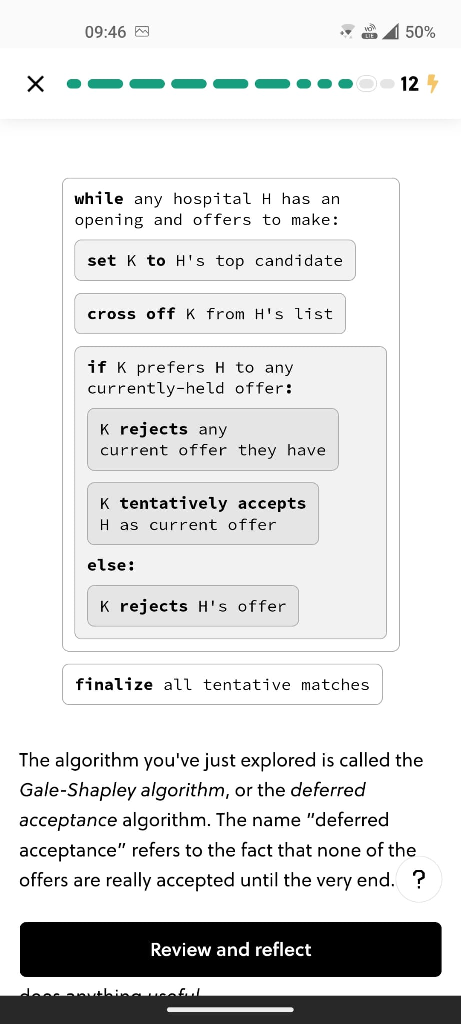

### Python Code

Source: https://github.com/amritaravishankar/stable-matching

In [ ]:
# This is a sample Python script.

# Press ⌃R to execute it or replace it with your code.
# Press Double ⇧ to search everywhere for classes, files, tool windows, actions,
# and settings.
"""
    @Author: Amrita Ravishankar
    @Publication-Date: 20/8/21
    @Description:
    The stable matching algorithm seeks to solve the problem of finding a stable
    match between two sets of equal size given a list of preferences for each
    element. We can define "matching" and "stable" by the following definitions.
    Matching: Mapping from the elements of one set to the elements of another set
    Stable: No element A of the first set that prefers an element B of the second
    set over its current partner such that element B prefers element A over its
    current partner.

    NOTE: I learnt the algorithm with the men and women being considered as two
    different sets for matching. For simplicity of implementation, I have
    continued with the same. However, I support diversity of all kinds <3
"""

import collections


def print_description():
    print('''
    GALE-SHAPLEY ALGORITHM - STABLE MATCHING PROBLEM

    The stable matching algorithm seeks to solve the problem of finding a stable
    match between two sets of equal size given a list of preferences for each
    element.

    We can define "matching" and "stable" by the following definitions.
    Matching: Mapping from the elements of one set to the elements of another set
    Stable: No element A of the first set that prefers an element B of the second
    set over its current partner such that element B prefers element A over its
    current partner.
    ''')
    print()



# keep track of matches that have been temporarily set up
tentative_matches = []

# men that need to still be matched successfully
available_men = []

men_preferences = collections.defaultdict(list)     # rankings of women preferred by each man
women_preferences = collections.defaultdict(list)   # rankings of men preferred by each woman


def take_user_input():
    n = int(input("Please input the desired number of members in each set: "))
    print()
    men = input(f"Please enter names of {n} men, separated by commas and no spaces eg. Mac,John: ")
    names_of_men = men.split(",")
    if len(names_of_men) != n:
        print("Exiting since number of men differ from initial input")
        exit()

    women = input(f"Please enter names of  {n} women, separated by commas and no spaces eg. Olivia,Tina: ")
    names_of_women = women.split(",")
    if len(names_of_women) != n:
        print("Exiting since number of women differ from initial input")
        exit()

    print()
    print("For each man, insert his ranking preference of the above women, separated by commas.")
    for man in names_of_men:
        print("Man: ", man)
        preferences = input("Preference ranking: ")
        men_preferences[man] = preferences.split(",")
        print()

    print()
    print("Great! We're done with men's preferences")
    print()

    print("For each woman, insert her ranking preference of the above men, separated by commas.")
    for woman in names_of_women:
        print("Woman: ", woman)
        preferences = input("Preference ranking: ")
        women_preferences[woman] = preferences.split(",")
        print()
    print()


def available_men_setup():
    for man, women in men_preferences.items():
        available_men.append(man)


def start_matching(man):
    print("Currently checking for : ", man)
    for woman in men_preferences[man]:
        existing_match = [match for match in tentative_matches if woman in match]

        # if the woman is not a part of any match yet - she is single
        if len(existing_match) == 0:
            # can be set up with the man
            tentative_matches.append([man, woman])
            available_men.remove(man)
            print(man, " is no longer available to be set up and is tentatively matched with ", woman)
            break

        # woman has a match - she is not single
        elif len(existing_match) > 0:
            matched_man = existing_match[0][0]
            print(woman, " is already matched with ", matched_man)

            # check rankings of matched man vs potential man
            matched_man_index = women_preferences[woman].index(matched_man)
            potential_man_index = women_preferences[woman].index(man)

            if matched_man_index < potential_man_index:
                print(woman, " is already happy with her match - ", matched_man, ", no rematching will take place...")

            else:
                print(woman, " would be happier with ", man, ", rematching will take place...")
                print(matched_man, " is available again...")

                available_men.append(matched_man)
                available_men.remove(man)

                # update the match
                existing_match[0][0] = man
                break


# perform the matching algorithm until all men have been successully matched up
def stable_matching():
    while len(available_men) > 0:
        for man in available_men:
            start_matching(man)
    print("The matching has been successfully completed!")


def main():
    print_description()
    take_user_input()
    available_men_setup()
    print("The available men currently are ", available_men)
    print()
    print("Calculation Logs")
    stable_matching()
    print()
    print("The matches are: ")
    print(tentative_matches)


main()


    GALE-SHAPLEY ALGORITHM - STABLE MATCHING PROBLEM
    
    The stable matching algorithm seeks to solve the problem of finding a stable 
    match between two sets of equal size given a list of preferences for each
    element. 
    
    We can define "matching" and "stable" by the following definitions.
    Matching: Mapping from the elements of one set to the elements of another set
    Stable: No element A of the first set that prefers an element B of the second 
    set over its current partner such that element B prefers element A over its 
    current partner.
    

Please input the desired number of members in each set: 1

Please enter names of 1 men, separated by commas and no spaces eg. Mac,John: 1
Please enter names of  1 women, separated by commas and no spaces eg. Olivia,Tina: Ștefan

For each man, insert his ranking preference of the above women, separated by commas.
Man:  1
Preference ranking: Noemi


Great! We're done with men's preferences

For each woman, insert he

## Chess Table Using List Comprehensions (n-dimensional-array) @ Python Institute

In [ ]:
chess_board = [[column for column in range(8)] for row in range(8)]
print(*chess_board, sep="\n")

[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]


## Reverse List @ Python Institute

1. `my_list = [10, 1, 8, 3, 5]`: This line creates a list called `my_list` with the values `[10, 1, 8, 3, 5]`.
2. `length = len(my_list)`: This line gets the length of the list `my_list` and assigns it to the variable `length`.
3. `for i in range(length // 2):`: This line starts a loop that will run for half of the length of the list (rounded down if the length is odd). The variable `i` will take on the values `0`, `1`, ..., up to but not including `length // 2`.
4. `my_list[i], my_list[length - i - 1] = my_list[length - i - 1], my_list[i]`: This line swaps the values at positions `i` and `length - i - 1` in the list. For example, if `i = 0`, then this line swaps the first and last elements of the list. The backslash at the end of this line is just a way to split a long line of code into two lines for readability.

So in summary, this code reverses the order of the elements in the list.

In [ ]:
my_list = [10, 1, 8, 3, 5]
length = len(my_list)

for i in range(length // 2):
    my_list[i], my_list[length - i - 1] =\
    my_list[length - i - 1], my_list[i]

my_list

[5, 3, 8, 1, 10]

## Find the Max @ Python Institute

In [ ]:
# my_list = [17, 3, 11, 5, 1, 9, 7, 15, 13]
# largest = my_list[0]

# for i in range(1, len(my_list)):
#     if my_list[i] > largest:
#         largest = my_list[i]

# print(largest)

# my_list = [17, 3, 11, 5, 1, 9, 7, 15, 13]
# largest = my_list[0]

# for i in my_list:
#     if i > largest:
#         largest = i

# print(largest)


my_list = [17, 3, 11, 5, 1, 9, 7, 15, 13]
largest = my_list[0]

for i in my_list[1:]:
    if i > largest:
        largest = i

print(largest)

17


## Find Element in List @ Python Institute

In [ ]:
my_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
to_find = 5
found = False

for i in range(len(my_list)):
    found = (my_list[i] == to_find)
    if found:
        break

if found:
    print("Element found at index", i)
else:
    print("absent")

Element found at index 4


## Find Lottery Hits @ Python Institute

In [ ]:
drawn = [5, 11, 9, 42, 3, 49]
bets = [3, 7, 11, 42, 34, 49]
hits = 0

hits_list = []

for number in bets:
    if number in drawn:
        hits += 1
        hits_list.append(number)

print("You have guessed", hits, "numbers: ", end="")
print(*hits_list, sep=", ", end="")
print(".")

You have guessed 4 numbers: 3, 11, 42, 49.


## List w Unique Elements Only @ Python Institute

In [ ]:
my_list = [1, 2, 4, 4, 1, 4, 2, 6, 2, 9]
#

new_list = []

for i in my_list:
    if i not in new_list:
        new_list.append(i)

#
print("The list with unique elements only:", *new_list)
print("The original list:", *my_list)

The list with unique elements only: 1 2 4 6 9
The original list: 1 2 4 4 1 4 2 6 2 9


## Leap Year Vs. Not Leap Year @ Python Institute

In [ ]:
# https://iq.opengenus.org/check-if-given-year-is-leap-year/
# https://edube.org/learn/pe-1/lab-a-leap-year-writing-your-own-functions-2
# https://edube.org/learn/pe-1/lab-how-many-days-writing-and-using-your-own-functions-2
# if year is divisible by 400
# the year is leap year
# if year is divisible by 4 but not by 100
# the year is leap year
# else
# the year is not leap year

def is_year_leap(year):
    if year % 400 == 0:
        return True
    elif (year % 4 == 0) and (year % 100 != 0):
        return True
    else:
        return False

def days_in_month(year, month):
    days_month_leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    days_month_common_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    month -= 1 # calendaristic months in range 1..12 while fn range is 0..11

    if is_year_leap(year):
        return days_month_leap_year[month]
    else:
        return days_month_common_year[month]

test_years = [1900, 2000, 2016, 1987]
test_months = [2, 2, 1, 11]
test_results = [28, 29, 31, 30]
for i in range(len(test_years)):
	yr = test_years[i]
	mo = test_months[i]
	print(yr, mo, "-> ", end="")
	result = days_in_month(yr, mo)
	if result == test_results[i]:
		print("OK")
	else:
		print("Failed")


1900 2 -> OK
2000 2 -> OK
2016 1 -> OK
1987 11 -> OK


In [ ]:
def is_year_leap(year):
    if year % 400 == 0:
        return True
    elif (year % 4 == 0) and (year % 100 != 0):
        return True
    else:
        return False

def days_in_month(year, month):
    days_month_leap_year = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    days_month_common_year = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    month -= 1 # calendaristic months in range 1..12 while fn range is 0..11

    if is_year_leap(year):
        # print(days_month_leap_year[:month])
        return days_month_leap_year[:month]
    else:
        # print(days_month_common_year[:month+1])
        return days_month_common_year[:month+1]

def day_of_year(year, month, day):
    return sum(days_in_month(year, month)) + day


# print(day_of_year(2000, 12, 31))
test_years = [1900, 2000, 2016, 1987]
test_months = [2, 12, 1, 11]
test_days = [1, 31, 31, 30]
test_results = [60, 366, 31, 364]
for i in range(len(test_years)):
	yr = test_years[i]
	mo = test_months[i]
	da = test_days[i]
	print(yr, mo, da, "-> ", end="")
	result = day_of_year(yr, mo, da)
	# print(f"[DEBUG] Test days: {test_results[i]} | Res. days: {result}")
	if result == test_results[i]:
		print("OK")
	else:
		print("Failed")


1900 2 1 -> OK
2000 12 31 -> OK
2016 1 31 -> OK
1987 11 30 -> OK


## Prime Numbers @ Python Institute

https://edube.org/learn/pe-1/lab-prime-numbers-how-to-find-them-2

In [ ]:
def is_prime(num):
    for divisor in range(2, num // 2 + 1):
        if num % divisor == 0:
            return False
    return True

for i in range(1, 20):
    if is_prime(i + 1):
        print(i + 1, end=" ")
print()


2 3 5 7 11 13 17 19 


## Liters/100Km to MPG @ Python Institute

https://edube.org/learn/pe-1/lab-converting-fuel-consumption-3

In [ ]:
AMERICAN_MILE = 1.609344 # meters
AMERICAN_GALLON = 3.785411784 # litres
CONVERSION_FACTOR = 235.214583 # liters/100km to mpg

def liters_100km_to_miles_gallon(liters):
    return f"{CONVERSION_FACTOR / liters:.2f}"

def miles_gallon_to_liters_100km(miles):
    return f"{CONVERSION_FACTOR / miles:.2f}"

print(liters_100km_to_miles_gallon(3.9))
print(liters_100km_to_miles_gallon(7.5))
print(liters_100km_to_miles_gallon(10.))
print(miles_gallon_to_liters_100km(60.3))
print(miles_gallon_to_liters_100km(31.4))
print(miles_gallon_to_liters_100km(23.5))


60.31
31.36
23.52
3.90
7.49
10.01


## BMI Calculator in Metric or Imperial @ Python Institute

In [ ]:
def ft_and_inch_to_m(ft, inch = 0.0):
    return ft * 0.3048 + inch * 0.0254


def lb_to_kg(lb):
    return lb * 0.45359237


def bmi(weight, height):
    if height < 1.0 or height > 2.5 or weight < 20 or weight > 200:
        return None

    return weight / height ** 2

metric_imperial = int(input("Type 1 for Metric or 2 for Imperial standard: "))

if metric_imperial == 1:
  weight = float(input("Input the weight in kg (e.g., 74): "))
  height = float(input("Input the height in meters and centimeters (e.g., 1.78): "))
  print(bmi(weight, height))
elif metric_imperial == 2:
  weight = float(input("Input the weight in lb (e.g., 150): "))
  ft = float(input("Input the height in feet (e.g., 5): "))
  inch = float(input("... and the number of inches (e.g., 7)"))
  print(bmi(lb_to_kg(weight), ft_and_inch_to_m(ft, inch)))


Type 1 for Metric or 2 for Imperial standard: 2
Input the weight in lb (e.g., 150): 150
Input the height in feet (e.g., 5): 5
... and the number of inches (e.g., 7)7
23.493080183977252


## Factorial of n (n!) & Fibonacci Numbers Using Recursion @ Python Institute

In [ ]:
def factorial_function(n):
    if n < 0:
        return None
    if n < 2:
        return 1
    return n * factorial_function(n - 1)

n = 5
print(f"\nFactorial of {n} is `{n}!` and its value is:", factorial_function(n))



Factorial of 5 is `5!` and its value is: 120


In [ ]:
def fib(n):
    if n < 1:
        return None
    if n < 3:
        return 1

    return fib(n-1) + fib(n-2)

print("The first 10 Fibonacci numbers are:")
for n in range(1, 11):
    print(fib(n))


The first 10 Fibonacci numbers are:
1
1
2
3
5
8
13
21
34
55


## Student Score Catalogue: Tuples and Dicionaries Can Work Together @ Python Institute

https://edube.org/learn/pe-1/tuples-and-dictionaries-27

In [ ]:
school_class = {}

while True:
    name = input("Enter the student's name: ")
    if name == '':
        break

    score = int(input("Enter the student's score (0-10): "))
    if score not in range(0, 11):
	    break

    if name in school_class:
        school_class[name] += (score,)
    else:
        school_class[name] = (score,)

for name in sorted(school_class.keys()):
    adding = 0
    counter = 0
    for score in school_class[name]:
        adding += score
        counter += 1
    print(name, ":", adding / counter)


Enter the student's name: Bob
Enter the student's score (0-10): 7
Enter the student's name: Andy
Enter the student's score (0-10): 3
Enter the student's name: Bob
Enter the student's score (0-10): 2
Enter the student's name: Andy
Enter the student's score (0-10): 10
Enter the student's name: Andy
Enter the student's score (0-10): 3
Enter the student's name: Bob
Enter the student's score (0-10): 9
Enter the student's name: 
Andy : 5.333333333333333
Bob : 6.0


In [ ]:
colors = (("green", "#008000"), ("blue", "#0000FF"))
colors_dictionary = {}

# for item in colors:
#   colors_dictionary[item[0]] = item[1]

colors_dictionary = dict(colors)

print(colors_dictionary)

{'green': '#008000', 'blue': '#0000FF'}


## Tic-tac-toe @ ChatGPT 3.5

In [ ]:
def display_board():
    print(f"{board[0]} | {board[1]} | {board[2]}")
    print("--+---+--")
    print(f"{board[3]} | {board[4]} | {board[5]}")
    print("--+---+--")
    print(f"{board[6]} | {board[7]} | {board[8]}")

def check_win(player):
    return (
        (board[0] == board[1] == board[2] == player) or
        (board[3] == board[4] == board[5] == player) or
        (board[6] == board[7] == board[8] == player) or
        (board[0] == board[3] == board[6] == player) or
        (board[1] == board[4] == board[7] == player) or
        (board[2] == board[5] == board[8] == player) or
        (board[0] == board[4] == board[8] == player) or
        (board[2] == board[4] == board[6] == player)
    )

def play_game():
    current_player = "X"
    game_over = False
    possible_moves = board.copy()

    while not game_over:
        display_board()

        move = input(f"Player {current_player}, enter your move (1-9): ")
        possible_moves.remove(move)
        # print(possible_moves)
        if len(possible_moves) == 0:
          print("This is a draw!")
          break

        if move.isdigit() and 1 <= int(move) <= 9 and board[int(move) - 1].isdigit():
            board[int(move) - 1] = current_player
            if check_win(current_player):
                display_board()
                print(f"Player {current_player} wins!")
                game_over = True
            elif all(cell.isdigit() for cell in board):
                display_board()
                print("It's a tie!")
                game_over = True
            else:
                current_player = "O" if current_player == "X" else "X"
        else:
            print("Invalid move. Try again.")

if __name__ == "__main__":
    board = ["1", "2", "3", "4", "5", "6", "7", "8", "9"]
    play_game()


1 | 2 | 3
--+---+--
4 | 5 | 6
--+---+--
7 | 8 | 9


KeyboardInterrupt: ignored